## Estudo preliminar de dados sobre COVID-19
IQ/UERJ

In [2]:
from datetime import date
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
from ipywidgets import interact

%matplotlib inline
sns.set_style('whitegrid')

pd.set_option('display.max_rows', 150)

#### Última atualização do arquivo:

In [3]:
date.today().strftime("%d/%m/%Y")

'11/06/2020'

#### Pastas do diretório atual

In [4]:
for root, subfolder, files in os.walk(os.getcwd()):
    print("Current Folder: {}; Subfolders: {}; Files: {}".format(root.split(sep="\\")[-1], subfolder, files))

Current Folder: UERJ - COVID-19; Subfolders: ['.ipynb_checkpoints', 'Covid-19 - Prof. Eduardo', 'Covid-19-saude-gov']; Files: ['2020-05-14 - Global_Mobility_Report.csv', '2020-05-14 COVID-19 Estudo Preliminar.ipynb', '2020-05-18 COVID-19 Estudo Preliminar.ipynb', '2020-05-21 - Global_Mobility_Report.csv', '2020-05-28 COVID-19 Estudo Preliminar.ipynb', '2020-05-29 - Global_Mobility_Report.csv', '2020-06-01 COVID-19 Mobility.ipynb', '2020-06-03 COVID-19 Estudo Preliminar.ipynb', '2020-06-08 CNES database.ipynb', '2020-06-10 Brasil.io.ipynb', 'Book1.xlsx', 'Brasil.IO - COVID19 - Links por UF.xlsx', 'brasil.io-covid19-caso_full-2020-06-08-14.00.00.csv', 'brasil.io-covid19-caso_full-2020-06-10-22.28.24.csv', 'Costa et al 2020 UFV Metapopulation modeling of COVID-19 advancing into the countryside - an analysis of mitigation strategies for Brazil.pdf', 'Fanelli and Piazza - COVID19.pdf', 'HIST_PAINEL_COVIDBR_02jun2020.xlsx', 'HIST_PAINEL_COVIDBR_20200513.xlsx', 'HIST_PAINEL_COVIDBR_26mai2020.

## Dados de [covid.saude.gov.br](https://covid.saude.gov.br/)

In [5]:
# dados_gov_br = pd.read_excel('HIST_PAINEL_COVIDBR_20200513.xlsx')
# dados_gov_br = pd.read_excel('HIST_PAINEL_COVIDBR_26mai2020.xlsx')
# dados_gov_br.head(2)

In [6]:
dados_gov_br = pd.read_excel('HIST_PAINEL_COVIDBR_02jun2020.xlsx')
dados_gov_br.head(2)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125,1,0,0,0,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125,1,0,0,0,NaN,NaN


In [7]:
dados_gov_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147017 entries, 0 to 147016
Data columns (total 16 columns):
regiao                   147017 non-null object
estado                   146919 non-null object
municipio                143979 non-null object
coduf                    147017 non-null int64
codmun                   144726 non-null float64
codRegiaoSaude           143979 non-null float64
nomeRegiaoSaude          143979 non-null object
data                     147017 non-null object
semanaEpi                147017 non-null int64
populacaoTCU2019         146270 non-null object
casosAcumulado           147017 non-null int64
casosNovos               147017 non-null int64
obitosAcumulado          147017 non-null int64
obitosNovos              147017 non-null int64
Recuperadosnovos         45 non-null float64
emAcompanhamentoNovos    45 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 17.9+ MB


In [8]:
dados_gov_br.isnull().sum()

regiao                        0
estado                       98
municipio                  3038
coduf                         0
codmun                     2291
codRegiaoSaude             3038
nomeRegiaoSaude            3038
data                          0
semanaEpi                     0
populacaoTCU2019            747
casosAcumulado                0
casosNovos                    0
obitosAcumulado               0
obitosNovos                   0
Recuperadosnovos         146972
emAcompanhamentoNovos    146972
dtype: int64

Os dados do arquivo disponibilizado em [covid.saude.gov.br](https://covid.saude.gov.br/) estão divididos entre dados do país, dos estados e dos municípios, e por isso mais dataframes serão criados para cada uma das agregações regionais.

Note que existem linhas vazias em duas colunas, pois 'Recuperadosnovos' e 'emAcompanhamentoNovos' ainda tem poucos casos apontados. Elas serão excluidas no primeiro momento da análise.

In [9]:
# dados_gov_br.drop(['Recuperadosnovos', 'emAcompanhamentoNovos'], inplace=True, axis=1)

pandas oferecem funcionalidades especiais para datas. Uma nova coluna de datas será criada com dados do tipo datetime.

In [10]:
dados_gov_br['datetime'] = pd.to_datetime(dados_gov_br['data'], format='%Y-%m-%d')

As colunas de códigos como coduf e codmun tem valores numéricos, mas se comportam como categorias.

In [11]:
dados_gov_br[['coduf','codmun','codRegiaoSaude']] = dados_gov_br[['coduf', 'codmun', 'codRegiaoSaude']].astype('category')

Dados de população vieram como string e há linhas sem esse dados

In [12]:
dados_gov_br.dropna(subset=['populacaoTCU2019'], inplace=True)

In [13]:
dados_gov_br[dados_gov_br['populacaoTCU2019'].str.contains(r"\(")]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime
5948,Norte,AM,Manaquiri,13,130255.0,13001.0,"Manaus, Entorno e Alto Rio Negro",2020-04-23,17,32.105(2),2,0,1,0,NaN,NaN,2020-04-23
5949,Norte,AM,Manaquiri,13,130255.0,13001.0,"Manaus, Entorno e Alto Rio Negro",2020-04-24,17,32.105(2),2,0,0,0,NaN,NaN,2020-04-24
5950,Norte,AM,Manaquiri,13,130255.0,13001.0,"Manaus, Entorno e Alto Rio Negro",2020-04-25,17,32.105(2),2,0,1,1,NaN,NaN,2020-04-25
5951,Norte,AM,Manaquiri,13,130255.0,13001.0,"Manaus, Entorno e Alto Rio Negro",2020-04-26,18,32.105(2),2,0,1,0,NaN,NaN,2020-04-26
5952,Norte,AM,Manaquiri,13,130255.0,13001.0,"Manaus, Entorno e Alto Rio Negro",2020-04-27,18,32.105(2),11,9,1,0,NaN,NaN,2020-04-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118306,Sul,PR,Santa Tereza do Oeste,41,412402.0,41010.0,10ª RS Cascavel,2020-05-29,22,10.139(17),7,0,0,0,NaN,NaN,2020-05-29
118307,Sul,PR,Santa Tereza do Oeste,41,412402.0,41010.0,10ª RS Cascavel,2020-05-30,22,10.139(17),7,0,0,0,NaN,NaN,2020-05-30
118308,Sul,PR,Santa Tereza do Oeste,41,412402.0,41010.0,10ª RS Cascavel,2020-05-31,23,10.139(17),7,0,0,0,NaN,NaN,2020-05-31
118309,Sul,PR,Santa Tereza do Oeste,41,412402.0,41010.0,10ª RS Cascavel,2020-06-01,23,10.139(17),7,0,0,0,NaN,NaN,2020-06-01


In [14]:
dados_gov_br['populacaoTCU2019'] = dados_gov_br['populacaoTCU2019'].apply(lambda i: re.sub(r"\(..?\)", "", i) if r"(" in i else i)
dados_gov_br['populacaoTCU2019'] = dados_gov_br['populacaoTCU2019'].str.replace('.','')

In [15]:
dados_gov_br['populacaoTCU2019'] = dados_gov_br['populacaoTCU2019'].astype('int')

Mudar NaN de Recuperados e emAcompanhamento novos para 0

In [16]:
dados_gov_br[['Recuperadosnovos', 'emAcompanhamentoNovos']] = dados_gov_br[['Recuperadosnovos', 'emAcompanhamentoNovos']].fillna(0)

In [17]:
dados_gov_br[['Recuperadosnovos', 'emAcompanhamentoNovos']] = dados_gov_br[['Recuperadosnovos', 'emAcompanhamentoNovos']].astype('int')

Lista das regiões, estados e da quantidade de municípios.

OBS: A lista de municípios possui duplicadas que só serão tratadas no dataframe dados_municipio

In [18]:
print(dados_gov_br['regiao'].unique())
print(dados_gov_br['estado'].unique())
print(len(dados_gov_br['municipio'].unique()))

['Brasil' 'Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']
[nan 'RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO' 'MA' 'PI' 'CE' 'RN' 'PB' 'PE' 'AL'
 'SE' 'BA' 'MG' 'ES' 'RJ' 'SP' 'PR' 'SC' 'RS' 'MS' 'MT' 'GO' 'DF']
4079


### Dados do país

In [19]:
dados_pais = dados_gov_br[(dados_gov_br['municipio'].isna()) & (dados_gov_br['regiao'] == 'Brasil')].copy()
dados_pais.drop(['estado', 'municipio', 'codmun', 'codRegiaoSaude', 'nomeRegiaoSaude'], inplace=True, axis=1)
dados_pais.head(5)

,regiao,coduf,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime
0,Brasil,76,2020-02-26,9,210147125,1,0,0,0,0,0,2020-02-26
1,Brasil,76,2020-02-27,9,210147125,1,0,0,0,0,0,2020-02-27
2,Brasil,76,2020-02-28,9,210147125,1,0,0,0,0,0,2020-02-28
3,Brasil,76,2020-02-29,9,210147125,2,1,0,0,0,0,2020-02-29
4,Brasil,76,2020-03-01,10,210147125,2,0,0,0,0,0,2020-03-01


In [20]:
dados_pais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 12 columns):
regiao                   98 non-null object
coduf                    98 non-null category
data                     98 non-null object
semanaEpi                98 non-null int64
populacaoTCU2019         98 non-null int32
casosAcumulado           98 non-null int64
casosNovos               98 non-null int64
obitosAcumulado          98 non-null int64
obitosNovos              98 non-null int64
Recuperadosnovos         98 non-null int32
emAcompanhamentoNovos    98 non-null int32
datetime                 98 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), int32(3), int64(5), object(2)
memory usage: 9.6+ KB


In [21]:
dados_pais.groupby(['regiao','data']).sum()

semanaEpi  populacaoTCU2019  casosAcumulado  casosNovos  \
regiao data                                                                  
Brasil 2020-02-26          9         210147125               1           0   
       2020-02-27          9         210147125               1           0   
       2020-02-28          9         210147125               1           0   
       2020-02-29          9         210147125               2           1   
       2020-03-01         10         210147125               2           0   
       2020-03-02         10         210147125               2           0   
       2020-03-03         10         210147125               2           0   
       2020-03-04         10         210147125               3           1   
       2020-03-05         10         210147125               7           4   
       2020-03-06         10         210147125              13           6   
       2020-03-07         10         210147125              19           6   
       2020-03-08         11         210147125              25           6   
       2020-03-09         11         210147125              25           0   
       2020-03-10         11         210147125              34           9   
       2020-03-11         11         210147125              52          18   
       2020-03-12         11         210147125              77          25   
       2020-03-13         11         210147125              98          21   
       2020-03-14         11         210147125             121          23   
       2020-03-15         12         210147125             200          79   
       2020-03-16         12         210147125             234          34   
       2020-03-17         12         210147125             291          57   
       2020-03-18         12         210147125             428         137   
       2020-03-19         12         210147125             621         193   
       2020-03-20         12         210147125             904         283   
       2020-03-21         12         210147125            1128         224   
       2020-03-22         13         210147125            1546         418   
       2020-03-23         13         210147125            1891         345   
       2020-03-24         13         210147125            2201         310   
       2020-03-25         13         210147125            2433         232   
       2020-03-26         13         210147125            2915         482   
       2020-03-27         13         210147125            3417         502   
       2020-03-28         13         210147125            3903         486   
       2020-03-29         14         210147125            4256         353   
       2020-03-30         14         210147125            4579         323   
       2020-03-31         14         210147125            5717        1138   
       2020-04-01         14         210147125            6834        1117   
       2020-04-02         14         210147125            7910        1076   
       2020-04-03         14         210147125            9056        1146   
       2020-04-04         14         210147125           10278        1222   
       2020-04-05         15         210147125           11130         852   
       2020-04-06         15         210147125           12056         926   
       2020-04-07         15         210147125           13717        1661   
       2020-04-08         15         210147125           15927        2210   
       2020-04-09         15         210147125           17857        1930   
       2020-04-10         15         210147125           19638        1781   
       2020-04-11         15         210147125           20727        1089   
       2020-04-12         16         210147125           22169        1442   
       2020-04-13         16         210147125           23430        1261   
       2020-04-14         16         210147125           25262        1832   
       2020-04-15         16         2101

### Dados dos estados

In [22]:
dados_estados = dados_gov_br[(dados_gov_br['municipio'].isna()) & (dados_gov_br['regiao'] != 'Brasil')].copy()
dados_estados.drop(['municipio', 'coduf', 'semanaEpi', 'codmun', 'codRegiaoSaude', 'nomeRegiaoSaude'], inplace=True, axis=1)
dados_estados.head()

,regiao,estado,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime
98,Norte,RO,2020-03-20,1777225,1,0,0,0,0,0,2020-03-20
99,Norte,RO,2020-03-21,1777225,1,0,0,0,0,0,2020-03-21
100,Norte,RO,2020-03-22,1777225,3,2,0,0,0,0,2020-03-22
101,Norte,RO,2020-03-23,1777225,3,0,0,0,0,0,2020-03-23
102,Norte,RO,2020-03-24,1777225,3,0,0,0,0,0,2020-03-24


In [23]:
dados_estados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2193 entries, 98 to 2290
Data columns (total 11 columns):
regiao                   2193 non-null object
estado                   2193 non-null object
data                     2193 non-null object
populacaoTCU2019         2193 non-null int32
casosAcumulado           2193 non-null int64
casosNovos               2193 non-null int64
obitosAcumulado          2193 non-null int64
obitosNovos              2193 non-null int64
Recuperadosnovos         2193 non-null int32
emAcompanhamentoNovos    2193 non-null int32
datetime                 2193 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(4), object(3)
memory usage: 179.9+ KB


In [24]:
dados_estados.dropna(subset=['populacaoTCU2019'], axis=0, inplace=True)

### População por estado

In [25]:
populacao_estados = dados_estados[dados_estados['populacaoTCU2019'].notna()].copy()
populacao_estados = populacao_estados[populacao_estados['estado'].duplicated() == False]
populacao_estados.drop(['data', 'regiao', 'casosAcumulado', 'obitosAcumulado'], inplace=True, axis=1)
populacao_estados.reset_index(drop=True, inplace=True)
populacao_estados['populacaoTCU2019'] = populacao_estados['populacaoTCU2019'].astype(int)
populacao_estados

,estado,populacaoTCU2019,casosNovos,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime
0,RO,1777225,0,0,0,0,2020-03-20
1,AC,881935,0,0,0,0,2020-03-19
2,AM,4144597,0,0,0,0,2020-03-15
3,RR,605761,0,0,0,0,2020-03-22
4,PA,8602865,0,0,0,0,2020-03-19
5,AP,845731,0,0,0,0,2020-03-20
6,TO,1572866,0,0,0,0,2020-03-19
7,MA,7075181,0,0,0,0,2020-03-21
8,PI,3273227,0,0,0,0,2020-03-20
9,CE,9132078,0,0,0,0,2020-03-17


In [26]:
populacao_estados = populacao_estados.set_index('estado').to_dict()['populacaoTCU2019']
populacao_estados

{'RO': 1777225,
 'AC': 881935,
 'AM': 4144597,
 'RR': 605761,
 'PA': 8602865,
 'AP': 845731,
 'TO': 1572866,
 'MA': 7075181,
 'PI': 3273227,
 'CE': 9132078,
 'RN': 3506853,
 'PB': 4018127,
 'PE': 9557071,
 'AL': 3337357,
 'SE': 2298696,
 'BA': 14873064,
 'MG': 21168791,
 'ES': 4018650,
 'RJ': 17264943,
 'SP': 45919049,
 'PR': 11433957,
 'SC': 7164788,
 'RS': 11377239,
 'MS': 2778986,
 'MT': 3484466,
 'GO': 7018354,
 'DF': 3015268}

In [27]:
populacao_estados['BA']

14873064

#### Dicionários de cada estado e suas regiões e capitais

In [28]:
regiao_estados = {"AM": "Norte", "RR": "Norte", "AP": "Norte", "PA": "Norte", 
                  "TO": "Norte", "RO": "Norte", "AC": "Norte", 
                  "MA": "Nordeste", "PI": "Nordeste", "CE": "Nordeste", 
                  "RN": "Nordeste", "PE": "Nordeste", "PB": "Nordeste", 
                  "SE": "Nordeste", "AL": "Nordeste", "BA": "Nordeste", 
                  "MT": "Centro-Oeste", "MS": "Centro-Oeste", "GO": "Centro-Oeste", 
                  "SP": "Sudeste", "RJ": "Sudeste", "ES": "Sudeste", "MG": "Sudeste", 
                  "PR": "Sul", "RS": "Sul", "SC": "Sul"}

In [29]:
capitais_estados = {"AM": "Manaus", "RR": "Boa Vista", "AP": "Macapá", "PA": "Belém", 
                    "TO": "Palmas", "RO": "Porto Velho", "AC": "Rio Branco", 
                    "MA": "São Luís", "PI": "Teresina", "CE": "Fortaleza", 
                    "RN": "Natal", "PE": "Recife", "PB": "João Pessoa", 
                    "SE": "Aracaju", "AL": "Maceió", "BA": "Salvador", 
                    "MT": "Cuiabá", "MS": "Campo Grande", "GO": "Goiânia", 
                    "SP": "São Paulo", "RJ": "Rio de Janeiro", "ES": "Vitória", 
                    "MG": "Belo Horizonte", "PR": "Curitiba", 
                    "RS": "Porto Alegre", "SC": "Florianópolis"}

In [30]:
nomes_estados = {"AC": "Acre", "AM": "Amazonas", "AP": "Amapá", "PA": "Pará", 
                 "RO": "Rondônia", "RR": "Roraima", "TO": "Tocantins", 
                 "AL": "Alagoas", "BA": "Bahia", "CE": "Ceará", "MA": "Maranhão", "PB": "Paraíba", 
                 "PE": "Pernambuco", "PI": "Piauí", "RN": "Rio Grande do Norte", "SE": "Sergipe", 
                 "DF": "Distrito Federal", "GO": "Goiás", "MS": "Mato Grosso do Sul", "MT": "Mato Grosso", 
                 "ES": "Espírito Santo", "MG": "Minas Gerais", "RJ": "Rio de Janeiro", "SP": "São Paulo", 
                 "PR": "Paraná", "RS": "Rio Grande do Sul", "SC": "Santa Catarina"}

### dados_estados: casos e óbito normalizados

In [31]:
dados_estados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2193 entries, 98 to 2290
Data columns (total 11 columns):
regiao                   2193 non-null object
estado                   2193 non-null object
data                     2193 non-null object
populacaoTCU2019         2193 non-null int32
casosAcumulado           2193 non-null int64
casosNovos               2193 non-null int64
obitosAcumulado          2193 non-null int64
obitosNovos              2193 non-null int64
Recuperadosnovos         2193 non-null int32
emAcompanhamentoNovos    2193 non-null int32
datetime                 2193 non-null datetime64[ns]
dtypes: datetime64[ns](1), int32(3), int64(4), object(3)
memory usage: 179.9+ KB


In [32]:
# Casos normalizados por milhão de habitantes
dados_estados['casosNormalizado'] = dados_estados['casosAcumulado'] / (dados_estados['populacaoTCU2019'] / 1000000)
dados_estados['obitosNormalizado'] = dados_estados['obitosAcumulado'] / (dados_estados['populacaoTCU2019'] / 1000000)

In [33]:
dados_estados.head(2)

,regiao,estado,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime,casosNormalizado,obitosNormalizado
98,Norte,RO,2020-03-20,1777225,1,0,0,0,0,0,2020-03-20,0.562675,0.0
99,Norte,RO,2020-03-21,1777225,1,0,0,0,0,0,2020-03-21,0.562675,0.0


### dados_estados: contador de dias desde o primeiro caso e óbito

Criação das colunas com contadores de dias passados após o primeiro caso e o primeiro óbitos em cada município

In [34]:
def contador_dias(dataframe, groupby_list):
    '''
    Cria colunas com contador dos dias desde o primeiro caso ('contadorDiasCasos') 
    e desde o primeiro óbito ('contadorObitosCasos')
    
    groupby_list = variável para agrupar ('municipioEstado' para dataframe de muncípios
    ou 'estado' para dataframe de estado)
    '''
    dataframe['contadorDiasCasos'] = dataframe.sort_values(by=['datetime']).groupby(groupby_list)['casosAcumulado'].cumcount() + 1
    dataframe['contadorObitosCasos'] = dataframe[dataframe['obitosAcumulado'] > 0].sort_values(by=['datetime']).groupby(groupby_list)['obitosAcumulado'].cumcount() + 1
    dataframe['contadorObitosCasos'].fillna(0, inplace=True)
    dataframe['contadorObitosCasos'] = dataframe['contadorObitosCasos'].astype(int)

In [35]:
contador_dias(dados_estados, ['estado'])

In [36]:
dados_estados.sort_values(by=['datetime']).loc[(dados_estados['estado']=='SP')].head(150)

,regiao,estado,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime,casosNormalizado,obitosNormalizado,contadorDiasCasos,contadorObitosCasos
1619,Sudeste,SP,2020-02-26,45919049,1,0,0,0,0,0,2020-02-26,0.021777,0.000000,1,0
1620,Sudeste,SP,2020-02-27,45919049,1,0,0,0,0,0,2020-02-27,0.021777,0.000000,2,0
1621,Sudeste,SP,2020-02-28,45919049,1,0,0,0,0,0,2020-02-28,0.021777,0.000000,3,0
1622,Sudeste,SP,2020-02-29,45919049,2,1,0,0,0,0,2020-02-29,0.043555,0.000000,4,0
1623,Sudeste,SP,2020-03-01,45919049,2,0,0,0,0,0,2020-03-01,0.043555,0.000000,5,0
1624,Sudeste,SP,2020-03-02,45919049,2,0,0,0,0,0,2020-03-02,0.043555,0.000000,6,0
1625,Sudeste,SP,2020-03-03,45919049,2,0,0,0,0,0,2020-03-03,0.043555,0.000000,7,0
1626,Sudeste,SP,2020-03-04,45919049,3,1,0,0,0,0,2020-03-04,0.065332,0.000000,8,0
1627,Sudeste,SP,2020-03-05,45919049,6,3,0,0,0,0,2020-03-05,0.130665,0.000000,9,0
1628,Sudeste,SP,2020-03-06,45919049,10,4,0,0,0,0,2020-03-06,0.217775,0.000000,10,0


In [37]:
# dados_estados.to_csv('dados_estados.csv', index=False)

### Dados por região

In [38]:
dados_regiao = dados_gov_br[(dados_gov_br['municipio'].isna()) & (dados_gov_br['regiao'] != 'Brasil')].copy()
dados_regiao.drop(['municipio', 'coduf', 'semanaEpi', 'codmun', 'codRegiaoSaude', 'nomeRegiaoSaude'], inplace=True, axis=1)
dados_regiao.head()

,regiao,estado,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime
98,Norte,RO,2020-03-20,1777225,1,0,0,0,0,0,2020-03-20
99,Norte,RO,2020-03-21,1777225,1,0,0,0,0,0,2020-03-21
100,Norte,RO,2020-03-22,1777225,3,2,0,0,0,0,2020-03-22
101,Norte,RO,2020-03-23,1777225,3,0,0,0,0,0,2020-03-23
102,Norte,RO,2020-03-24,1777225,3,0,0,0,0,0,2020-03-24


In [39]:
dados_regiao = dados_regiao.groupby(['regiao', 'datetime']).sum().reset_index()

In [40]:
dados_regiao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
regiao                   440 non-null object
datetime                 440 non-null datetime64[ns]
populacaoTCU2019         440 non-null int32
casosAcumulado           440 non-null int64
casosNovos               440 non-null int64
obitosAcumulado          440 non-null int64
obitosNovos              440 non-null int64
Recuperadosnovos         440 non-null int32
emAcompanhamentoNovos    440 non-null int32
dtypes: datetime64[ns](1), int32(3), int64(4), object(1)
memory usage: 25.9+ KB


### dados_regiao: casos e óbito normalizados

In [41]:
# Casos normalizados por milhão de habitantes
dados_regiao['casosNormalizado'] = dados_regiao['casosAcumulado'] / (dados_regiao['populacaoTCU2019'] / 1000000)
dados_regiao['obitosNormalizado'] = dados_regiao['obitosAcumulado'] / (dados_regiao['populacaoTCU2019'] / 1000000)
dados_regiao.head(10)

,regiao,datetime,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,casosNormalizado,obitosNormalizado
0,Centro-Oeste,2020-03-07,3015268,1,0,0,0,0,0,0.331645,0.0
1,Centro-Oeste,2020-03-08,3015268,1,0,0,0,0,0,0.331645,0.0
2,Centro-Oeste,2020-03-09,3015268,1,0,0,0,0,0,0.331645,0.0
3,Centro-Oeste,2020-03-10,3015268,1,0,0,0,0,0,0.331645,0.0
4,Centro-Oeste,2020-03-11,3015268,2,1,0,0,0,0,0.663291,0.0
5,Centro-Oeste,2020-03-12,3015268,2,0,0,0,0,0,0.663291,0.0
6,Centro-Oeste,2020-03-13,10033622,5,0,0,0,0,0,0.498325,0.0
7,Centro-Oeste,2020-03-14,10033622,9,4,0,0,0,0,0.896984,0.0
8,Centro-Oeste,2020-03-15,10033622,11,2,0,0,0,0,1.096314,0.0
9,Centro-Oeste,2020-03-16,12812608,18,5,0,0,0,0,1.404866,0.0


### dados_regiao: contador de dias desde o primeiro caso e óbito

In [42]:
contador_dias(dados_regiao, ['regiao'])
dados_regiao.head(5)

,regiao,datetime,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,casosNormalizado,obitosNormalizado,contadorDiasCasos,contadorObitosCasos
0,Centro-Oeste,2020-03-07,3015268,1,0,0,0,0,0,0.331645,0.0,1,0
1,Centro-Oeste,2020-03-08,3015268,1,0,0,0,0,0,0.331645,0.0,2,0
2,Centro-Oeste,2020-03-09,3015268,1,0,0,0,0,0,0.331645,0.0,3,0
3,Centro-Oeste,2020-03-10,3015268,1,0,0,0,0,0,0.331645,0.0,4,0
4,Centro-Oeste,2020-03-11,3015268,2,1,0,0,0,0,0.663291,0.0,5,0


In [43]:
# dados_regiao.to_csv('dados_regiao.csv', index=False)

### Dados dos municípios

In [44]:
dados_municipios = dados_gov_br[dados_gov_br['municipio'].notna()].copy()
dados_municipios.head(5)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime
2294,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,Zona da Mata,2020-05-02,18,22945,1,0,0,0,0,0,2020-05-02
2295,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,Zona da Mata,2020-05-03,19,22945,1,0,0,0,0,0,2020-05-03
2296,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,Zona da Mata,2020-05-04,19,22945,1,0,0,0,0,0,2020-05-04
2297,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,Zona da Mata,2020-05-05,19,22945,1,0,0,0,0,0,2020-05-05
2298,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,Zona da Mata,2020-05-06,19,22945,1,0,0,0,0,0,2020-05-06


As colunas de códigos e região não serão usadas a principio e por isso serão removidas

In [45]:
# dados_municipios.drop(['Recuperadosnovos', 'emAcompanhamentoNovos'], axis=1, inplace=True)
dados_municipios.drop(['coduf', 'codmun', 'codRegiaoSaude', 'nomeRegiaoSaude'], axis=1, inplace=True)

In [46]:
dados_municipios.head(2)

,regiao,estado,municipio,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime
2294,Norte,RO,Alta Floresta D'Oeste,2020-05-02,18,22945,1,0,0,0,0,0,2020-05-02
2295,Norte,RO,Alta Floresta D'Oeste,2020-05-03,19,22945,1,0,0,0,0,0,2020-05-03


### dados_municipios: coluna de municípios únicos

Existem municípios com nomes duplicados em estados diferentes. Para evitar agregações incorretas, uma nova coluna será criada, municipioEstado, a partir do dataframe dos municipios.

In [47]:
lista_municipios = dados_municipios.groupby(['municipio', 'estado']).count().reset_index()[['municipio','estado']].copy()
lista_municipios[lista_municipios['municipio'].duplicated()]

,municipio,estado
48,Alagoinha,PE
92,Alto Alegre,SP
106,Alto Paraíso,RO
119,Alvorada,TO
141,Amparo,SP
...,...,...
4209,Várzea,RN
4213,Várzea Grande,PI
4221,Wenceslau Braz,PR
4239,Água Branca,PB


In [48]:
lista_municipios[lista_municipios['municipio'] == 'Viçosa']

,municipio,estado
4201,Viçosa,AL
4202,Viçosa,MG
4203,Viçosa,RN


In [49]:
dados_municipios['municipioEstado'] = dados_municipios['municipio'] + '-' + dados_municipios['estado']
dados_municipios.head()

,regiao,estado,municipio,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime,municipioEstado
2294,Norte,RO,Alta Floresta D'Oeste,2020-05-02,18,22945,1,0,0,0,0,0,2020-05-02,Alta Floresta D'Oeste-RO
2295,Norte,RO,Alta Floresta D'Oeste,2020-05-03,19,22945,1,0,0,0,0,0,2020-05-03,Alta Floresta D'Oeste-RO
2296,Norte,RO,Alta Floresta D'Oeste,2020-05-04,19,22945,1,0,0,0,0,0,2020-05-04,Alta Floresta D'Oeste-RO
2297,Norte,RO,Alta Floresta D'Oeste,2020-05-05,19,22945,1,0,0,0,0,0,2020-05-05,Alta Floresta D'Oeste-RO
2298,Norte,RO,Alta Floresta D'Oeste,2020-05-06,19,22945,1,0,0,0,0,0,2020-05-06,Alta Floresta D'Oeste-RO


### dados_municipio: contador de dias desde o primeiro caso e óbito

In [50]:
contador_dias(dados_municipios, ['municipioEstado'])
# countEstados = contador_dias(dados_estados, ['estado'])

### dados_municipio: casos e óbitos normalizados

In [51]:
# Casos normalizados por milhão de habitantes
dados_municipios['casosNormalizado'] = dados_municipios['casosAcumulado'] / (dados_municipios['populacaoTCU2019'] / 1000000)
dados_municipios['obitosNormalizado'] = dados_municipios['obitosAcumulado'] / (dados_municipios['populacaoTCU2019'] / 1000000)
dados_municipios.head(2)

,regiao,estado,municipio,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime,municipioEstado,contadorDiasCasos,contadorObitosCasos,casosNormalizado,obitosNormalizado
2294,Norte,RO,Alta Floresta D'Oeste,2020-05-02,18,22945,1,0,0,0,0,0,2020-05-02,Alta Floresta D'Oeste-RO,1,0,43.58248,0.0
2295,Norte,RO,Alta Floresta D'Oeste,2020-05-03,19,22945,1,0,0,0,0,0,2020-05-03,Alta Floresta D'Oeste-RO,2,0,43.58248,0.0


In [52]:
# dados_municipios.loc[(dados_municipios['estado']=='SP') & (dados_municipios['municipioEstado']=='Bauru-SP')].head(20)
dados_municipios.loc[(dados_municipios['municipioEstado']=='Bauru-SP')].head(20)

,regiao,estado,municipio,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime,municipioEstado,contadorDiasCasos,contadorObitosCasos,casosNormalizado,obitosNormalizado
92282,Sudeste,SP,Bauru,2020-03-31,14,376818,1,0,0,0,0,0,2020-03-31,Bauru-SP,1,0,2.653801,0.000000
92283,Sudeste,SP,Bauru,2020-04-01,14,376818,2,1,0,0,0,0,2020-04-01,Bauru-SP,2,0,5.307602,0.000000
92284,Sudeste,SP,Bauru,2020-04-03,14,376818,2,0,0,0,0,0,2020-04-03,Bauru-SP,3,0,5.307602,0.000000
92285,Sudeste,SP,Bauru,2020-04-04,14,376818,2,0,0,0,0,0,2020-04-04,Bauru-SP,4,0,5.307602,0.000000
92286,Sudeste,SP,Bauru,2020-04-05,15,376818,3,1,1,1,0,0,2020-04-05,Bauru-SP,5,1,7.961403,2.653801
92287,Sudeste,SP,Bauru,2020-04-06,15,376818,6,3,1,0,0,0,2020-04-06,Bauru-SP,6,2,15.922806,2.653801
92288,Sudeste,SP,Bauru,2020-04-07,15,376818,7,1,2,1,0,0,2020-04-07,Bauru-SP,7,3,18.576607,5.307602
92289,Sudeste,SP,Bauru,2020-04-08,15,376818,8,1,1,0,0,0,2020-04-08,Bauru-SP,8,4,21.230408,2.653801
92290,Sudeste,SP,Bauru,2020-04-09,15,376818,10,2,1,0,0,0,2020-04-09,Bauru-SP,9,5,26.538010,2.653801
92291,Sudeste,SP,Bauru,2020-04-10,15,376818,11,1,1,0,0,0,2020-04-10,Bauru-SP,10,6,29.191811,2.653801


In [53]:
# dados_municipios.to_csv("DADOS_MUNICIPIOS_ANTIGOS", index=False)

### População por município - [IBGE 2019](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=resultados)

In [155]:
populacao_municipios = pd.read_csv('populacao_municipios_2019_IBGE.csv', engine='python')

In [156]:
populacao_municipios.rename(columns={'UF': 'uf', 'COD. UF': 'coduf', 'COD. MUNIC': 'codmun', 
                                     'NOME DO MUNICÍPIO': 'municipio', 'POPULAÇÃO ESTIMADA': 'populacaoTCU2019'}, inplace=True)

In [157]:
# populacao_municipios['populacaoTCU2019'] = populacao_municipios['populacaoTCU2019'].astype('int')

In [158]:
populacao_municipios.head()

,uf,coduf,codmun,municipio,populacaoTCU2019
0,RO,11,15,Alta Floresta D'Oeste,22945.0
1,RO,11,23,Ariquemes,107863.0
2,RO,11,31,Cabixi,5312.0
3,RO,11,49,Cacoal,85359.0
4,RO,11,56,Cerejeiras,16323.0


In [159]:
dados_municipios\
    .groupby(['datetime','estado'])['obitosAcumulado', 'casosAcumulado']\
    .sum()\
    .unstack()\
    .head(30)

obitosAcumulado                                         ...  \
estado                  AC  AL   AM  AP  BA   CE  DF  ES  GO   MA  ...   
datetime                                                           ...   
2020-03-28               0   0    1   0   0    4   0   0   1    0  ...   
2020-03-29               0   0    1   0   1    5   1   0   1    0  ...   
2020-03-30               0   0    1   0   1    5   1   0   1    1  ...   
2020-03-31               0   1    3   0   2    7   3   0   1    1  ...   
2020-04-01               0   1    3   0   2    9   3   0   1    1  ...   
2020-04-02               0   1    3   0   3   20   4   1   1    1  ...   
2020-04-03               0   2    7   0   5   22   5   4   2    1  ...   
2020-04-04               0   2   12   1   7   22   7   5   2    1  ...   
2020-04-05               0   2   14   2   9   26   7   6   3    2  ...   
2020-04-06               0   2   19   2  10   31  10   6   5    2  ...   
2020-04-07               1   2   23   2  14   41  12   6   5    4  ...   
2020-04-08               2   2   30   2  18   53  12   6   7   11  ...   
2020-04-09               2   2   40   2  19   57  13   6   7   12  ...   
2020-04-10               2   2   50   2  19   67  14   7   8   16  ...   
2020-04-11               2   2   53   3  20   74  14   9  10   21  ...   
2020-04-12               2   2   62   5  20   76  14   9  14   24  ...   
2020-04-13               3   2   71   5  21  100  15  14  15   27  ...   
2020-04-14               3   3   90   6  24  111  17  17  15   32  ...   
2020-04-15               3   4  106   7  27  124  17  18  15   34  ...   
2020-04-16               5   4  124   9  33  125  20  25  16   37  ...   
2020-04-17               5   6  145  10  35  149  20  27  16   40  ...   
2020-04-18               5   8  161  10  34  180  24  29  18   44  ...   
2020-04-19               6  13  182  11  45  189  24  32  18   48  ...   
2020-04-20               8  16  185  13  47  206  24  33  19   54  ...   
2020-04-21               8  17  193  13  48  224  24  33  19   60  ...   
2020-04-22               8  18  207  14  53  238  25  36  21   66  ...   
2020-04-23              10  20  234  16  62  270  25  42  23   76  ...   
2020-04-24              11  25  255  18  67  292  26  47  23   88  ...   
2020-04-25              11  27  287  19  72  325  26  51  24  100  ...   
2020-04-26              11  30  304  21  74  358  27  56  24  112  ...   

           casosAcumulado                                                   
estado                 PR    RJ   RN   RO   RR    RS    SC   SE     SP  TO  
datetime                                                                    
2020-03-28            133   558   45    6   12   193   176   16   1358   9  
2020-03-29            148   600   67    6   16   226   186   16   1404   9  
2020-03-30            155   657   75    6   16   241   189   16   1469  10  
2020-03-31            179   708   80    8   16   274   223   19   2286  11  
2020-04-01            224   832   90    9   22   306   227   20   2922  12  
2020-04-02            252   984  103   10   26   334   239   23   3431  12  
2020-04-03            301  1073  171   10   30   396   273   25   3979  12  
2020-04-04            395  1245  209   11   37   410   325   27   4390  14  
2020-04-05            438  1393  235   12   42   418   348   32   4547  17  
2020-04-06            458  1459  242   14   42   481   370   32   4791  17  
2020-04-07            503  1687  250   18   42   508   407   36   5605  19  
2020-04-08            539  1937  249   26   49   555   447   36   6622  23  
2020-04-09            609  2215  249   28   52   618   490   39   7390  23  
2020-04-10            643  2463  255   32   63   636   682   42   8123  23  
2020-04-11            676  2606  283   33   75   640   721   42   8340  23  
2020-04-12            738  2854  298   35   79   653   721   44   8668  25  
2020-04-13            756  3220  333   42   83   664   815   44   8805  26  
2020-04-14            791  3

### Plots

In [160]:
def caracteristicas_plot(bbox_anchor_x, bbox_anchor_y, labels_fontsize, legend_bool,
                        xaxis_datetime_bool, xaxis_title_string, yaxis_title_string):
    '''
    Função com os ajustes de características do plot, i.e tamanho das fontes de títulos e labels
    '''
    
    # Posiciona caixa de legendas para fora do gráfico, ao lado direito, se o usuário escolher ter legenda
    if legend_bool == True:
        plt.gcf().legend(bbox_to_anchor=(bbox_anchor_x, bbox_anchor_y), prop={'size': labels_fontsize-2})

    # Formata ticks do eixo x como datas, se o usuário escolher usar datas no eixo x
    if xaxis_datetime_bool == True:
        # formato da data do eixo para dia-mês e localização dos ticks no eixo
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m')) # '%d-%m' dia-mês; %U or %W Week number of the year
        plt.gca().xaxis.set_major_locator(mdates.DayLocator()) #mdates.DayLocator(); mdates.MonthLocator() determina a posição do tick quando se plota datas
        
        # rotaciona as labels do eixo x
        plt.gcf().autofmt_xdate()
              
    # nome do título do eixo
    plt.gca().set_xlabel(xaxis_title_string)
    plt.gca().set_ylabel(yaxis_title_string)
    
    # formata número (i.e. 10^4 para 10000 - %d=integer)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

    # tamanho da fonte das labels/títulos do eixo
    plt.gca().title.set_fontsize(labels_fontsize) 
    plt.gca().xaxis.label.set_fontsize(labels_fontsize) 
    plt.gca().yaxis.label.set_fontsize(labels_fontsize)

    # tamanho da fonte dos 'ticks' (dados/números/datas) do eixo
    # list comprehension para cada item/dados/número/dado do eixo
    [tick.label.set_fontsize(labels_fontsize) for tick in plt.gca().xaxis.get_major_ticks()]
    [tick.label.set_fontsize(labels_fontsize) for tick in plt.gca().yaxis.get_major_ticks()]
    
    plt.tight_layout()

In [161]:
def plot_data_completo(dataframe, column_string, rows_list, groupby_list, column_list, 
                       title_string, legend_bool, logy_bool, figsize_x, figsize_y, 
                       bbox_anchor_x, bbox_anchor_y, labels_fontsize,
                       xaxis_datetime_bool, xaxis_title_string, yaxis_title_string):
    '''
    # Pode ser um dataframe ou uma parte dele que use .loc[]
    # i.e. dados_municipios ou dados_municipios.loc[dados_municipios['estado']=="RJ"]
    
    # Exemplos:
    dados_estados.loc[dados_estados['estado'].isin(['RJ', 'SP', 'ES', 'MG'])]\
        .groupby(['datetime','estado'])['casosNormalizado']\
        .sum()\
        .unstack()\
        .plot(figsize=(15, 8), legend=False, logy=logy_bool, title=title_string)
    
    dados_municipios\
        .groupby(['datetime','estado'])['obitosAcumulado','casosAcumulado']\
        .sum()\
        .unstack()\
        .plot(figsize=(15,8), legend=False, logy=True)
    '''
    # dataframe.loc[dataframe[column_string].isin(rows_list)]\
    dataframe.loc[dataframe[column_string].isin(rows_list)]\
        .groupby(groupby_list)[column_list]\
        .sum()\
        .unstack()\
        .plot(figsize=(figsize_x, figsize_y), legend=False, logy=logy_bool, title=title_string)
    
    caracteristicas_plot(bbox_anchor_x, bbox_anchor_y, labels_fontsize, legend_bool,
                        xaxis_datetime_bool, xaxis_title_string, yaxis_title_string)

In [162]:
dados_municipios.columns

Index(['regiao', 'estado', 'municipio', 'data', 'semanaEpi',
       'populacaoTCU2019', 'casosAcumulado', 'casosNovos', 'obitosAcumulado',
       'obitosNovos', 'Recuperadosnovos', 'emAcompanhamentoNovos', 'datetime',
       'municipioEstado', 'contadorDiasCasos', 'contadorObitosCasos',
       'casosNormalizado', 'obitosNormalizado'],
      dtype='object')

### Média móvel - teste inicial

In [163]:
dados_municipios.sort_values(by=['datetime']).groupby(['municipioEstado']).rolling(7)['casosAcumulado'].mean()

municipioEstado           
Abadia de Goiás-GO  142804          NaN
                    142805          NaN
                    142806          NaN
                    142807          NaN
                    142808          NaN
                                ...    
Óbidos-PA           11220      8.571429
                    11221      8.857143
                    11222      9.428571
                    11223      9.857143
                    11224     10.714286
Name: casosAcumulado, Length: 143979, dtype: float64

In [164]:
dados_municipios.sort_values(by=['datetime']).groupby(['municipioEstado']).rolling(7)['casosAcumulado'].mean().reset_index(0,drop=True)

142804          NaN
142805          NaN
142806          NaN
142807          NaN
142808          NaN
            ...    
11220      8.571429
11221      8.857143
11222      9.428571
11223      9.857143
11224     10.714286
Name: casosAcumulado, Length: 143979, dtype: float64

In [165]:
# def media_movel(dataframe, groupby_list, rolling_days, dados_lista):
#     return dataframe.sort_values(by=['datetime'])\
#                     .groupby(groupby_list)\
#                     .rolling(rolling_days)\
#                     dados_lista\
#                     .mean()\
#                     .reset_index(0,drop=True)\
    
# media_movel(dataframe=dados_municipios, groupby_list=['municipioEstado'], rolling_days=7, dados_lista=['casosAcumulado'])    

In [166]:
dados_municipios['rolling_avg_7d_casosAcumulado'] = dados_municipios.sort_values(by=['datetime'])\
                                                                    .groupby(['municipioEstado'])\
                                                                    .rolling(3)['casosAcumulado']\
                                                                    .mean().reset_index(0,drop=True)

dados_municipios['rolling_avg_7d_casosNormalizado'] = dados_municipios.sort_values(by=['datetime'])\
                                                                    .groupby(['municipioEstado'])\
                                                                    .rolling(3)['casosNormalizado']\
                                                                    .mean().reset_index(0,drop=True)

### Plot

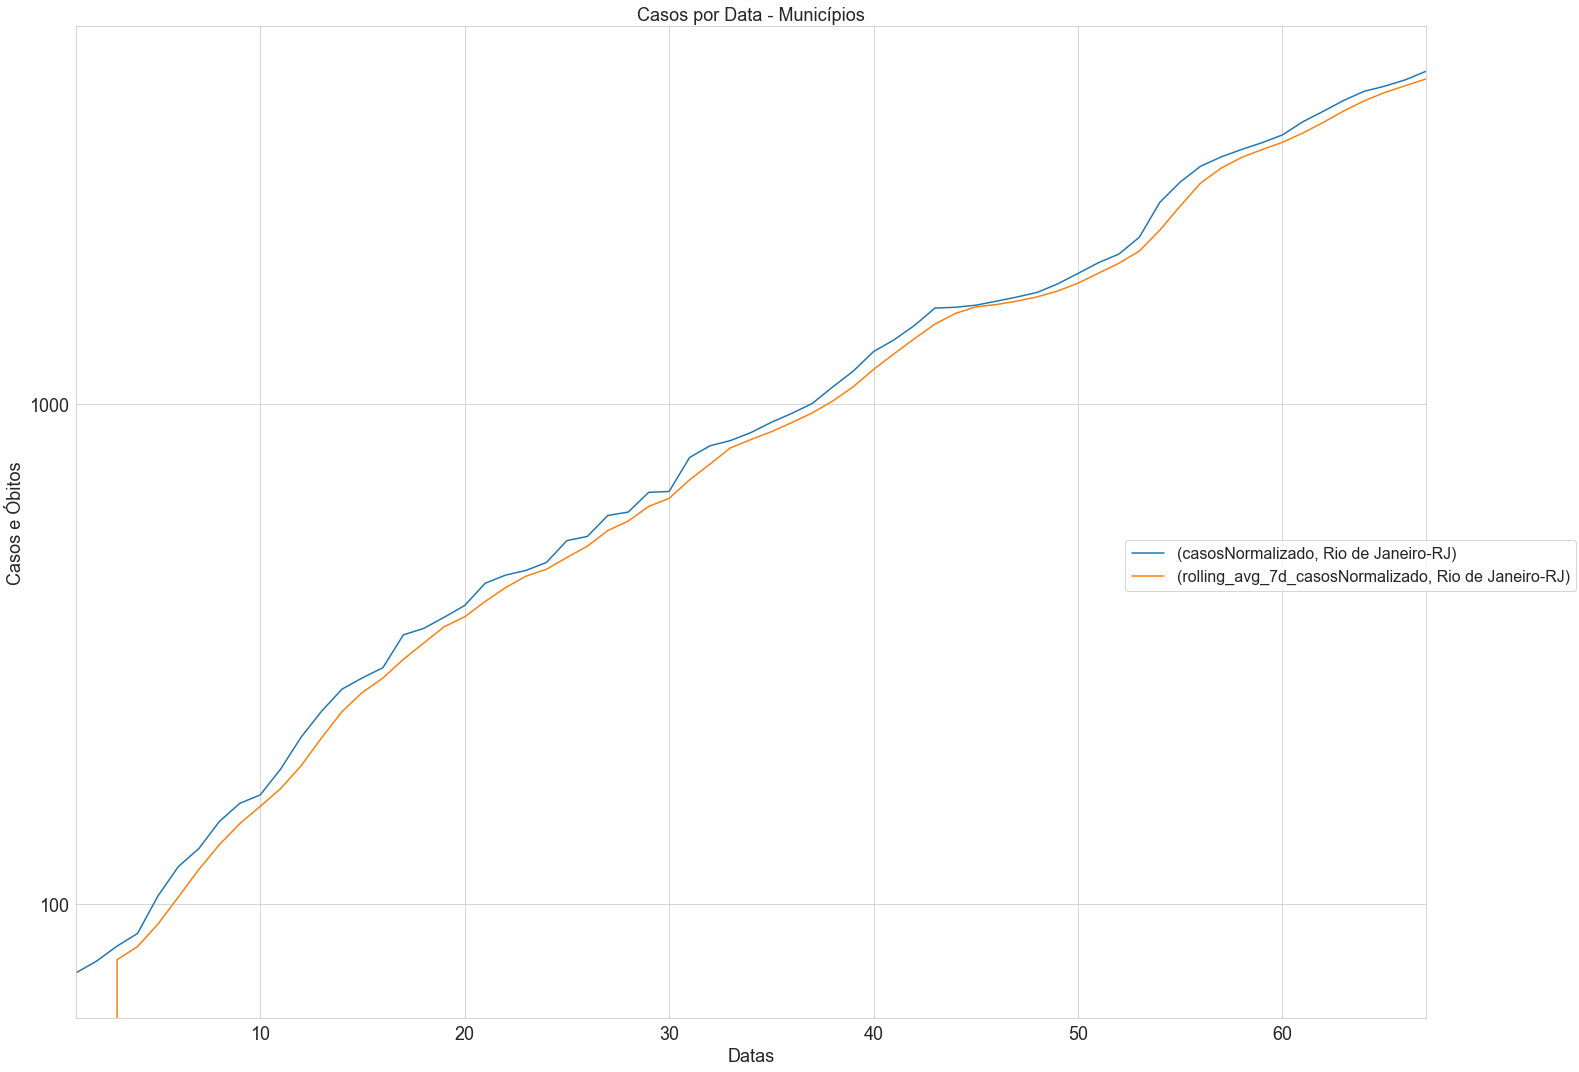

In [167]:
# municipios_plot = ['Rio de Janeiro-RJ','Queimados-RJ', 'Viçosa-MG', 'São Paulo-SP']
municipios_plot = ['Rio de Janeiro-RJ']

plot_data_completo(dataframe = dados_municipios, column_string = 'municipioEstado', 
            rows_list = municipios_plot, 
            groupby_list = ['contadorDiasCasos', 'municipioEstado'],
            column_list = ['casosNormalizado', 'rolling_avg_7d_casosNormalizado'], 
            title_string = "Casos por Data - Municípios", 
            legend_bool = True, logy_bool = True, figsize_x = 20, figsize_y = 15, 
            bbox_anchor_x = 1.1, bbox_anchor_y = 0.5, labels_fontsize = 18,
            xaxis_datetime_bool = False, xaxis_title_string = 'Datas', yaxis_title_string = 'Casos e Óbitos')

### Plot não interativo - dados_municipios

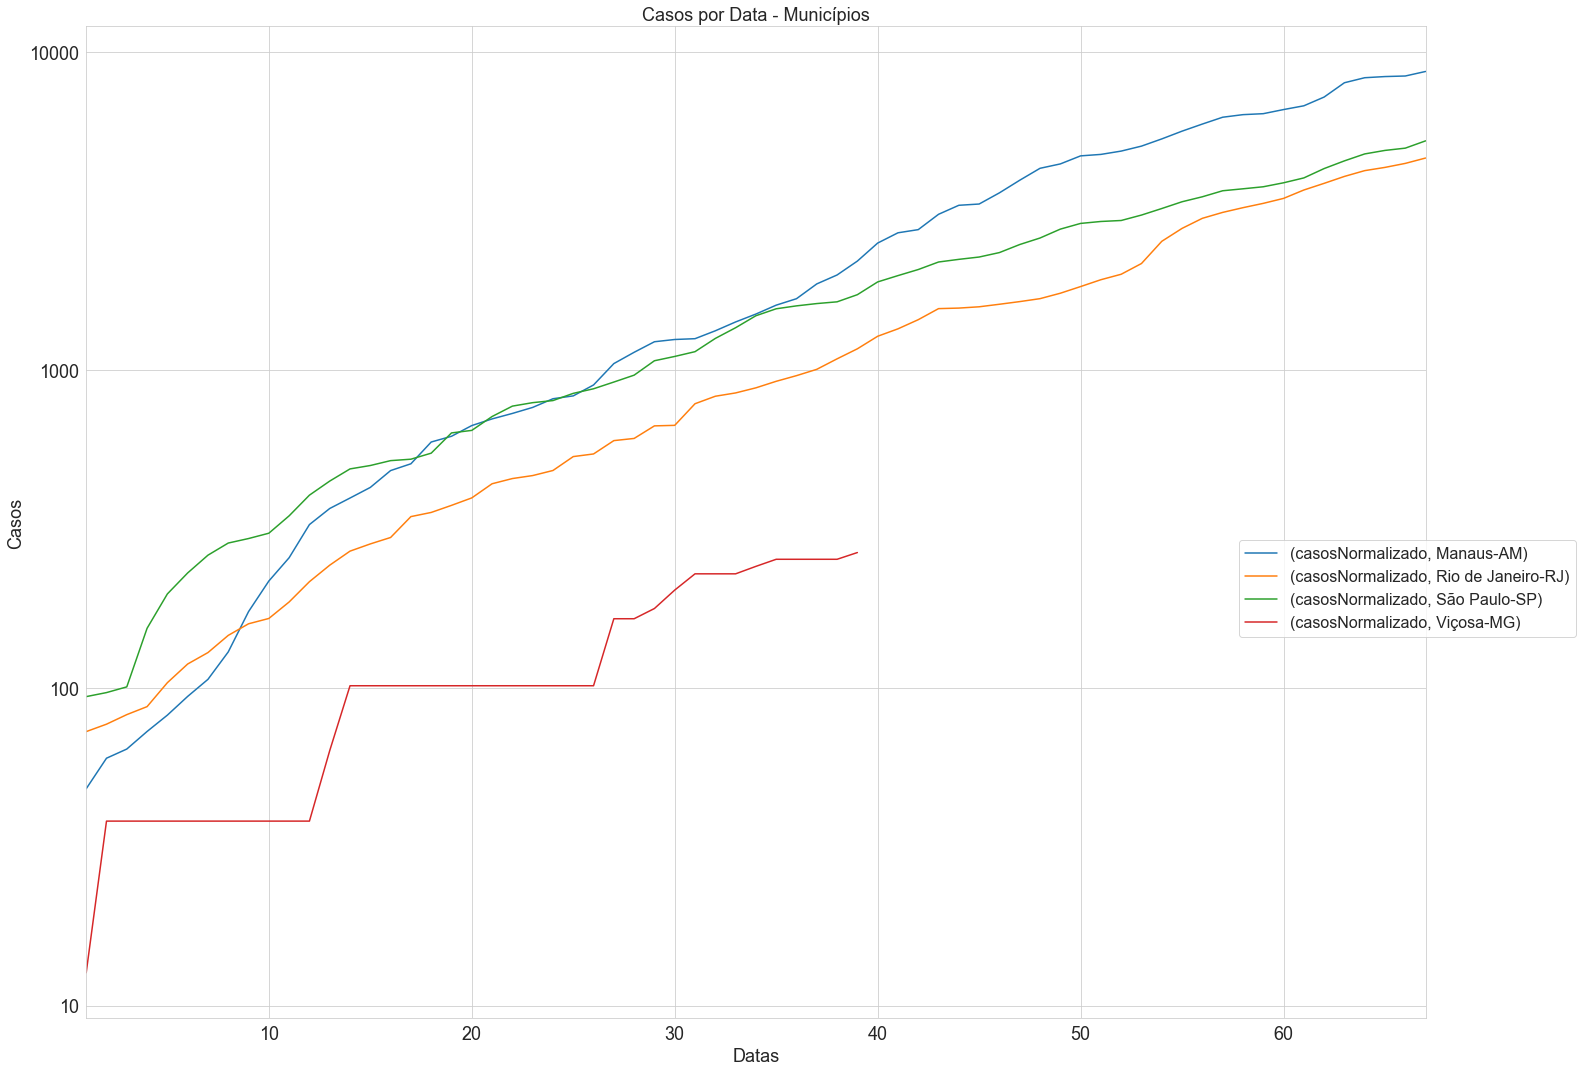

In [168]:
# municipios_plot = ['Rio de Janeiro-RJ','Queimados-RJ', 'Viçosa-MG', 'São Paulo-SP']
municipios_plot = ['Rio de Janeiro-RJ','Manaus-AM', 'Viçosa-MG', 'São Paulo-SP', 'Bélem-PA']

plot_data_completo(dataframe = dados_municipios, column_string = 'municipioEstado', 
            rows_list = municipios_plot, 
            groupby_list = ['contadorDiasCasos', 'municipioEstado'],
            column_list = ['casosNormalizado'], 
            title_string = "Casos por Data - Municípios", 
            legend_bool = True, logy_bool = True, figsize_x = 20, figsize_y = 15, 
            bbox_anchor_x = 1.1, bbox_anchor_y = 0.5, labels_fontsize = 18,
            xaxis_datetime_bool = False, xaxis_title_string = 'Datas', yaxis_title_string = 'Casos')

### Plot não interativo - dados_estados

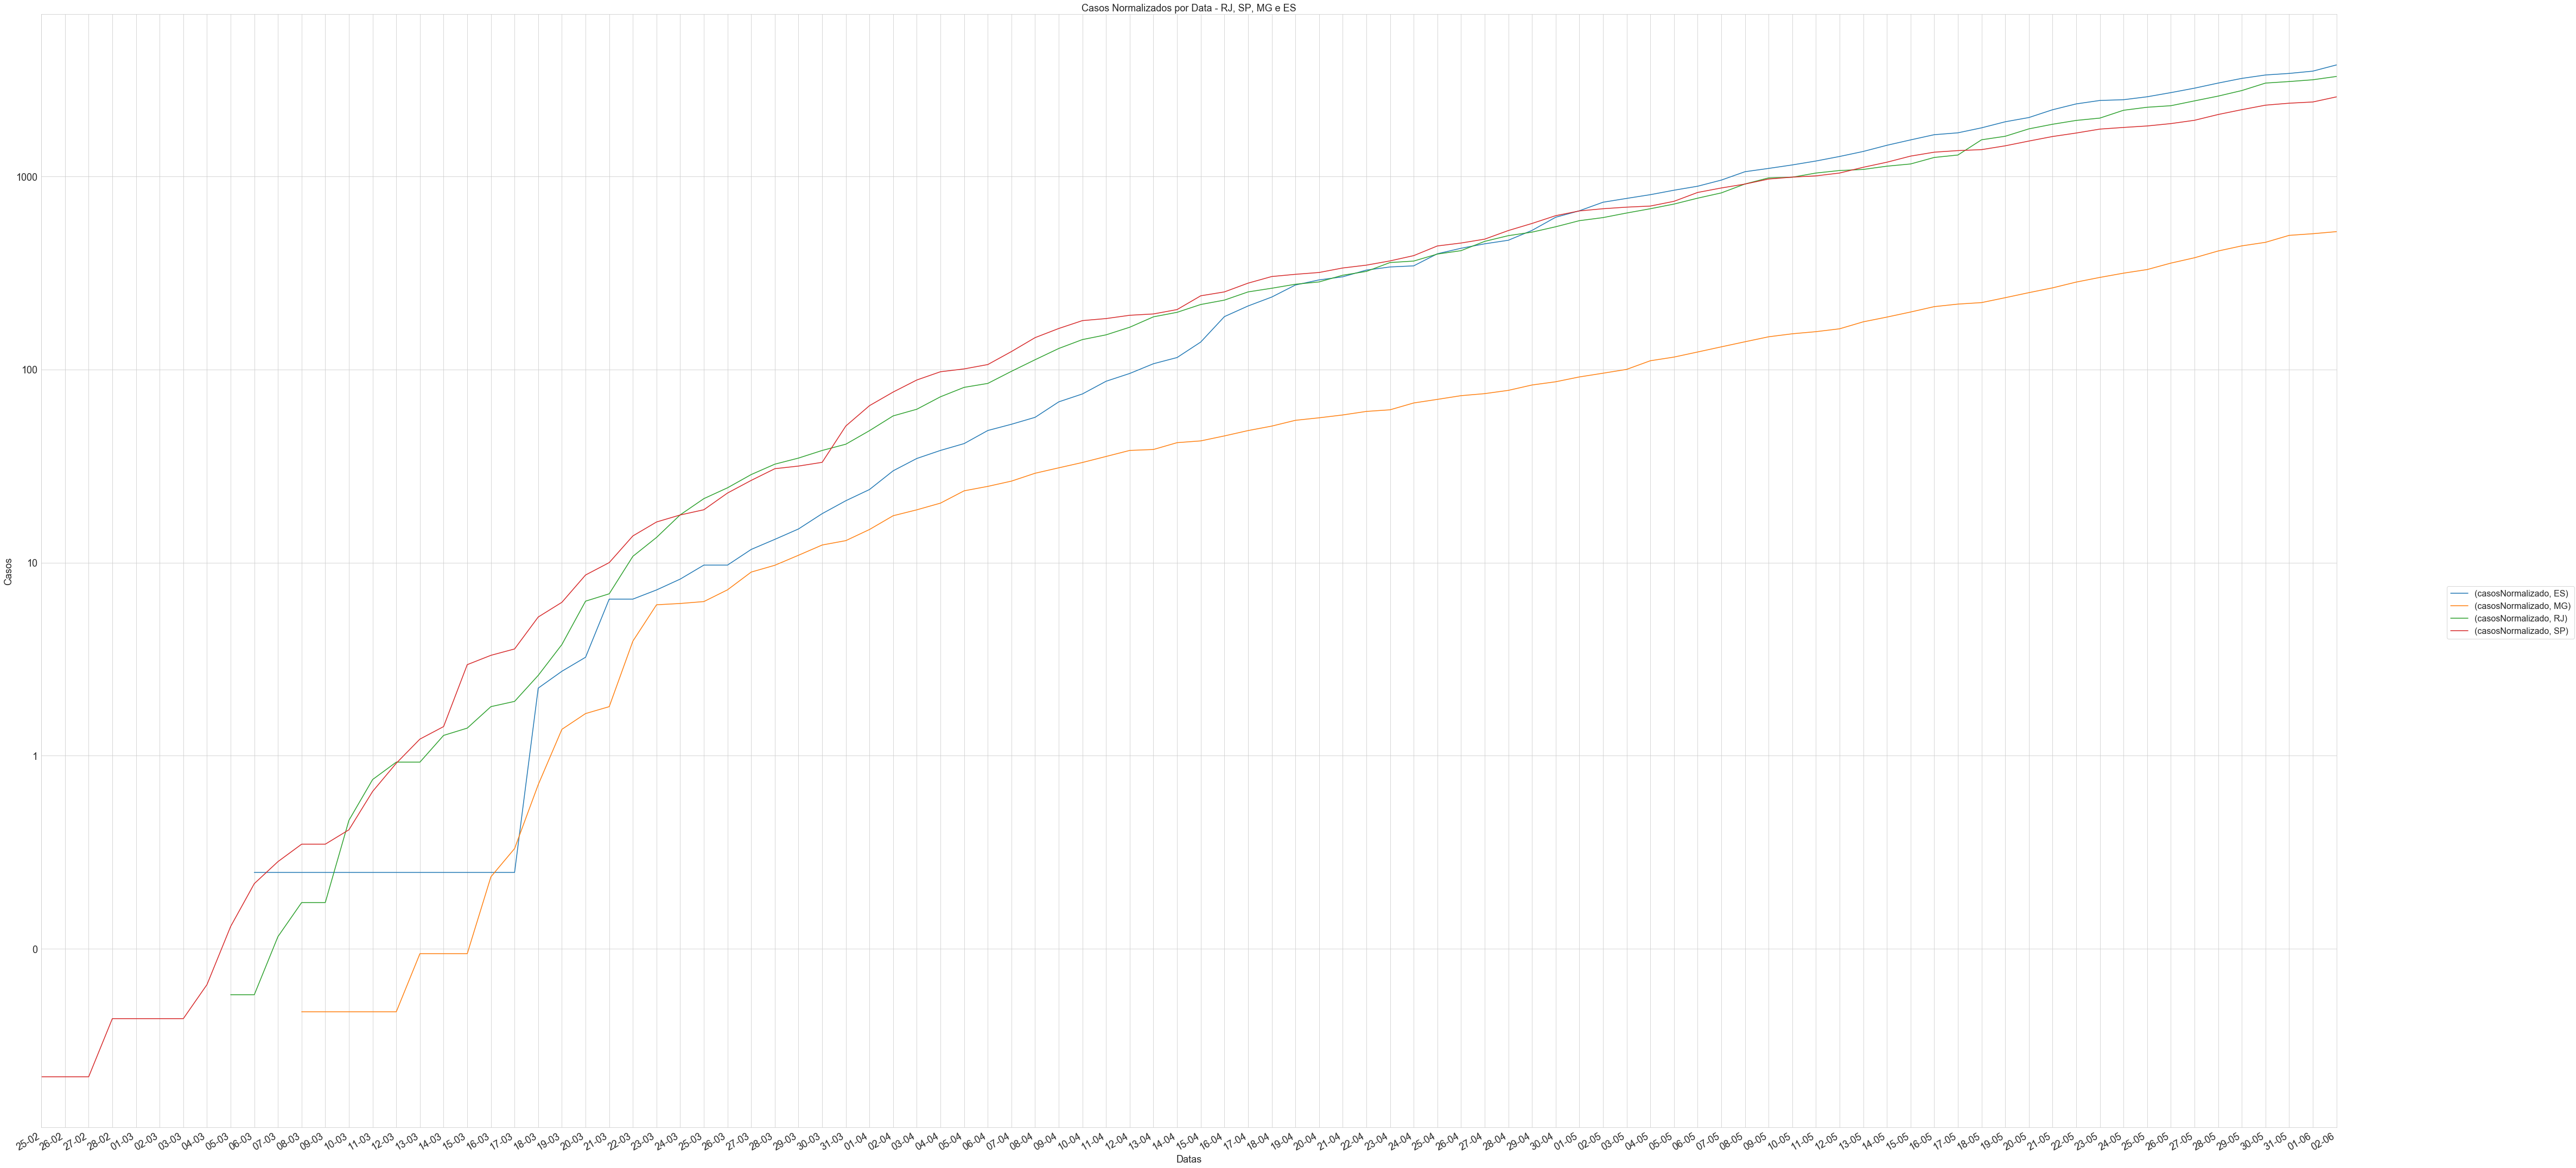

In [169]:
plot_data_completo(dataframe = dados_estados, column_string = 'estado', 
            rows_list = ['RJ','SP','MG','ES'], groupby_list = ['datetime', 'estado'],
            column_list = ['casosNormalizado'], 
            title_string = "Casos Normalizados por Data - RJ, SP, MG e ES", 
            legend_bool = True, logy_bool = True, figsize_x = 60, figsize_y = 30, 
            bbox_anchor_x = 1.1, bbox_anchor_y = 0.5, labels_fontsize = 18,
            xaxis_datetime_bool = True, xaxis_title_string = 'Datas', yaxis_title_string = 'Casos')

### Plot interativo

Para gráficos interativos, podemos usar ipywidgets e interact

In [170]:
def teste(regiao, estado, dado, date):
    return regiao, estado, dado, date

regiao_opcoes = ['Centro_Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']
estado_opcoes = ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']
date_opcoes_groupby = ['contadorDiasCasos', 'contadorObitosCasos', 'datetime']
dado_opcoes_column_list = ['casosNormalizado', 'obitosNormalizado', 'casosAcumulado', 'obitosAcumulado']

interact(teste, regiao=regiao_opcoes, estado=estado_opcoes, dado=date_opcoes_groupby, date=dado_opcoes_column_list)

('Centro_Oeste', 'AC', 'contadorDiasCasos', 'casosNormalizado')

<function __main__.teste(regiao, estado, dado, date)>

A função interactive do ipywidgets apresentou dois problemas: não aceitou listas ou dataframes como entrada. Portanto, para criar um checkbox de cada estado para visualizar múltiplos estados simultaneamente, a lista a ser passada para o dataframe será criada dentro da função de plot e cada estado será uma booleano. O dataframe também ficará fixo na função.

Teste inicial da lista:

### plot_multiplos_estados
Plota vários estados simultaneamente

dataframe = dados_estados

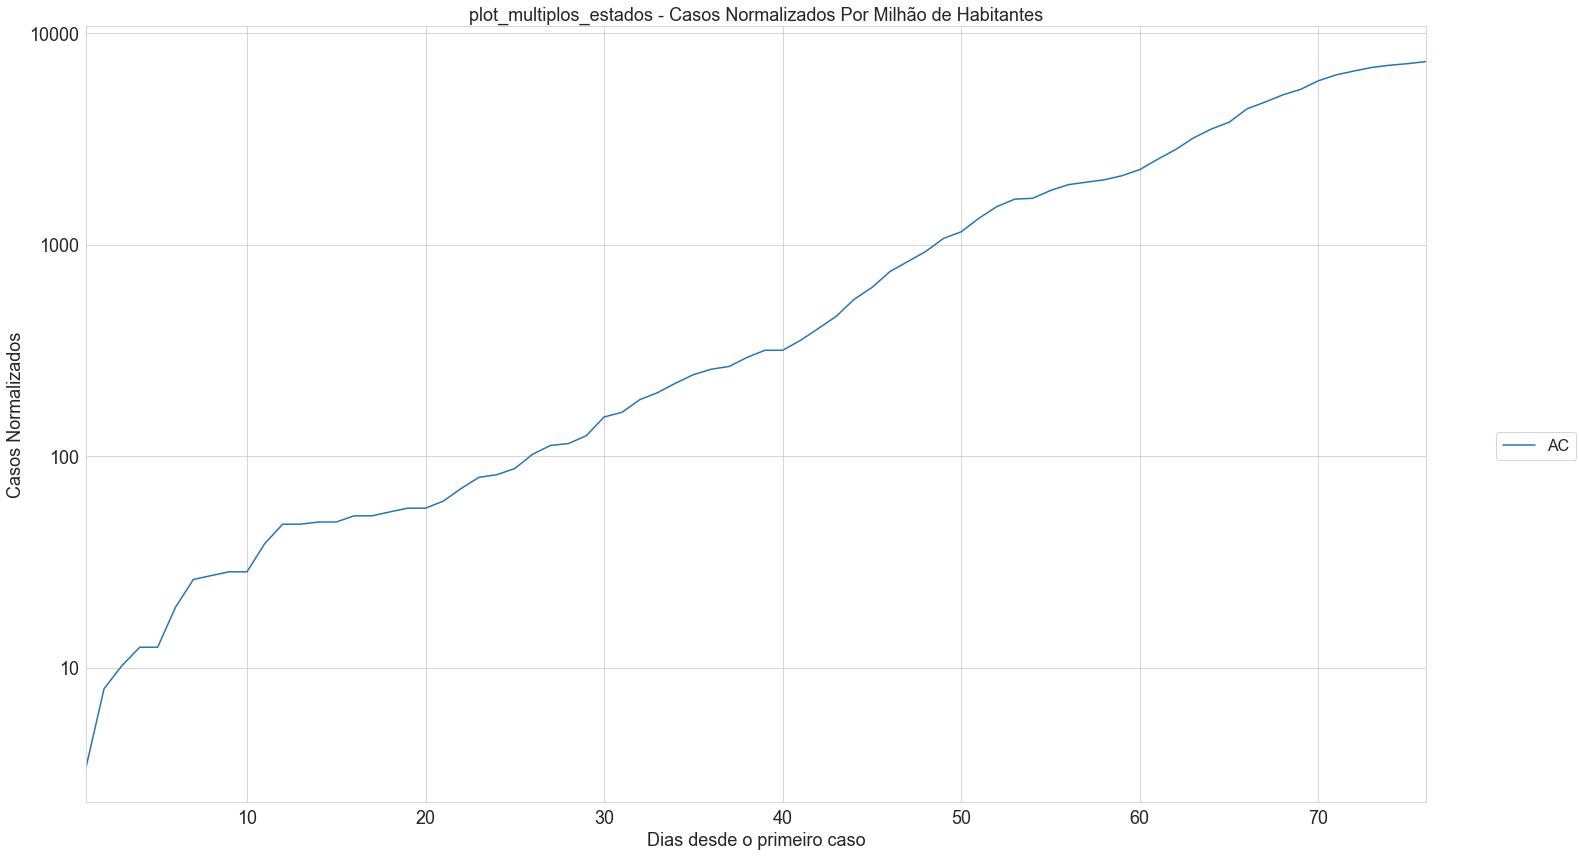

<function __main__.plot_multiplos_estados(groupby_string, column_list, title_string, legend_bool, logy_bool, figsize_x, figsize_y, bbox_anchor_x, bbox_anchor_y, labels_fontsize, xaxis_datetime_bool, xaxis_title_string, yaxis_title_string, Acre, Amazonas, Amapa, Para, Rondonia, Roraima, Tocantins, Alagoas, Bahia, Ceara, Maranhao, Paraiba, Pernambuco, Piaui, Rio_Grande_do_Norte, Sergipe, Distrito_Federal, Goias, Mato_Grosso_do_Sul, Mato_Grosso, Espirito_Santo, Minas_Gerais, Rio_de_Janeiro, Sao_Paulo, Parana, Rio_Grande_do_Sul, Santa_Catarina)>

In [171]:
def plot_multiplos_estados(groupby_string, column_list, title_string, legend_bool, logy_bool, 
            figsize_x, figsize_y, bbox_anchor_x, bbox_anchor_y, labels_fontsize,
            xaxis_datetime_bool, xaxis_title_string, yaxis_title_string,
            Acre, Amazonas, Amapa, Para, Rondonia, Roraima, Tocantins, 
            Alagoas, Bahia, Ceara, Maranhao, Paraiba, Pernambuco, 
            Piaui, Rio_Grande_do_Norte, Sergipe, 
            Distrito_Federal, Goias, Mato_Grosso_do_Sul, Mato_Grosso, 
            Espirito_Santo, Minas_Gerais, Rio_de_Janeiro, Sao_Paulo, 
            Parana, Rio_Grande_do_Sul, Santa_Catarina):
    
    opcoes_estados = ["AC", "AM", "AP", "PA", "RO", "RR", "TO", "AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE", "DF", "GO", "MS", "MT", "ES", "MG", "RJ", "SP", "PR", "RS", "SC"]
    lista_estado_bool = [Acre, Amazonas, Amapa, Para, Rondonia, Roraima, Tocantins, 
                         Alagoas, Bahia, Ceara, Maranhao, Paraiba, Pernambuco, 
                         Piaui, Rio_Grande_do_Norte, Sergipe, 
                         Distrito_Federal, Goias, Mato_Grosso_do_Sul, Mato_Grosso, 
                         Espirito_Santo, Minas_Gerais, Rio_de_Janeiro, Sao_Paulo, 
                         Parana, Rio_Grande_do_Sul, Santa_Catarina]
    lista_estado = []

    for index, value in enumerate(lista_estado_bool):
        if value == True:
            lista_estado.append(opcoes_estados[index])
    
    dados_estados.loc[dados_estados['estado'].isin(lista_estado)]\
        .groupby([groupby_string,'estado'])[column_list]\
        .sum()\
        .unstack()\
        .plot(figsize=(figsize_x, figsize_y), legend=False, logy=logy_bool, title=title_string)
    
    caracteristicas_plot(bbox_anchor_x, bbox_anchor_y, labels_fontsize, legend_bool,
                        xaxis_datetime_bool, xaxis_title_string, yaxis_title_string)

interact(plot_multiplos_estados,
    groupby_string = date_opcoes_groupby, 
    column_list = dado_opcoes_column_list,
    title_string = "plot_multiplos_estados - Casos Normalizados Por Milhão de Habitantes", 
    legend_bool = True, logy_bool = True, figsize_x = 20, figsize_y = 12,
    bbox_anchor_x = 1.1, bbox_anchor_y = 0.5, labels_fontsize = 18, xaxis_datetime_bool = False, 
    xaxis_title_string = "Dias desde o primeiro caso", yaxis_title_string = "Casos Normalizados",
    Acre=True, Amazonas=False, Amapa=False, Para=False, Rondonia=False, Roraima=False, Tocantins=False, 
    Alagoas=False, Bahia=False, Ceara=False, Maranhao=False, Paraiba=False, 
    Pernambuco=False, Piaui=False, Rio_Grande_do_Norte=False, Sergipe=False, 
    Distrito_Federal=False, Goias=False, Mato_Grosso_do_Sul=False, Mato_Grosso=False, 
    Espirito_Santo=False, Minas_Gerais=False, Rio_de_Janeiro=False, Sao_Paulo=False, 
    Parana=False, Rio_Grande_do_Sul=False, Santa_Catarina=False)

### plot_multiplas_regioes
Plota várias regiões simultaneamente

dataframe = dados_regioes

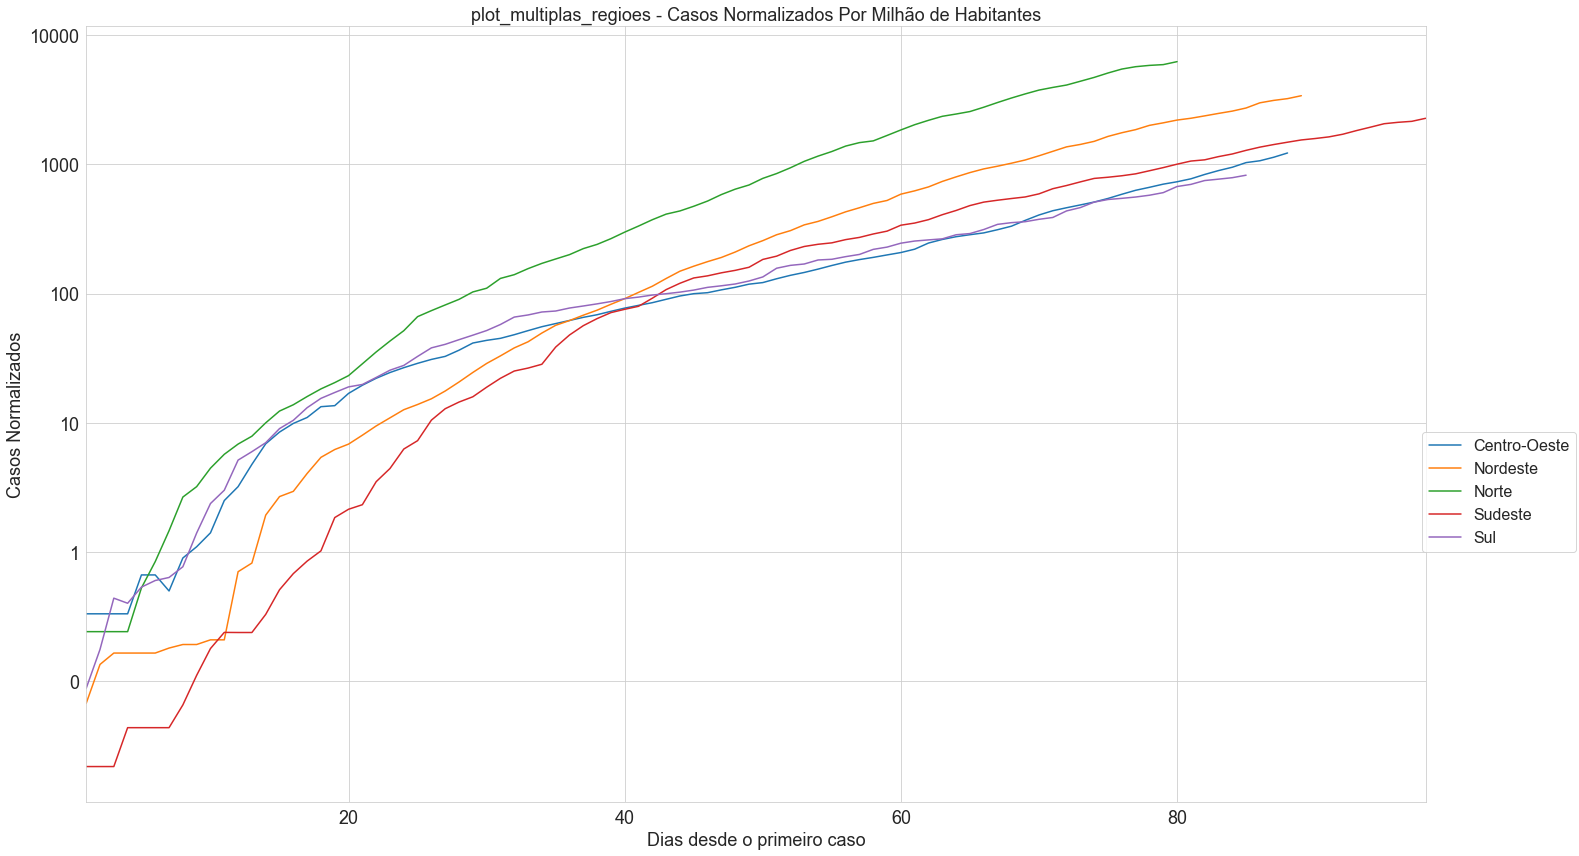

<function __main__.plot_multiplas_regioes(groupby_string, column_list, title_string, legend_bool, logy_bool, figsize_x, figsize_y, bbox_anchor_x, bbox_anchor_y, labels_fontsize, xaxis_datetime_bool, xaxis_title_string, yaxis_title_string, Centro_Oeste, Nordeste, Norte, Sudeste, Sul)>

In [172]:
def plot_multiplas_regioes(groupby_string, column_list, title_string, legend_bool, logy_bool, 
            figsize_x, figsize_y, bbox_anchor_x, bbox_anchor_y, labels_fontsize,
            xaxis_datetime_bool, xaxis_title_string, yaxis_title_string,
            Centro_Oeste, Nordeste, Norte, Sudeste, Sul):
    
    opcoes_regioes = ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']
    lista_regioes_bool = [Centro_Oeste, Nordeste, Norte, Sudeste, Sul]
    lista_regioes = []

    for index, value in enumerate(lista_regioes_bool):
        if value == True:
            lista_regioes.append(opcoes_regioes[index])
    
    dados_regiao.loc[dados_regiao['regiao'].isin(lista_regioes)]\
        .groupby([groupby_string,'regiao'])[column_list]\
        .sum()\
        .unstack()\
        .plot(figsize=(figsize_x, figsize_y), legend=False, logy=logy_bool, title=title_string)
    
    caracteristicas_plot(bbox_anchor_x, bbox_anchor_y, labels_fontsize, legend_bool,
                        xaxis_datetime_bool, xaxis_title_string, yaxis_title_string)

interact(plot_multiplas_regioes,
    groupby_string = date_opcoes_groupby, 
    column_list = dado_opcoes_column_list,
    title_string = "plot_multiplas_regioes - Casos Normalizados Por Milhão de Habitantes", 
    legend_bool = True, logy_bool = True, figsize_x = 20, figsize_y = 12,
    bbox_anchor_x = 1.1, bbox_anchor_y = 0.5, labels_fontsize = 18, xaxis_datetime_bool = False, 
    xaxis_title_string = "Dias desde o primeiro caso", yaxis_title_string = "Casos Normalizados",
    Centro_Oeste=True, Nordeste=True, Norte=True, Sudeste=True, Sul=True)

## Dados de [covid-insumos.saude.gov.br](https://covid-insumos.saude.gov.br/paineis/insumos/painel.php)

In [173]:
insumos = pd.read_csv('lista_insumos.csv', sep=";")
insumos

,uf,Vacinas distribuidas - influenza,Vacinas aplicadas - influenza,Mascara cirúrgica,Mascara N95,Alcool em gel - L,Avental,Teste rápido,Luvas,Óculos e protetor facial,...,Cloroquina - comprimidos,Oseltamivir - cápsulas,Teste PCR,Leitos locados,Leitos UTI adulto,Respiradores distribuidos,UTI adulto SUS,Uti adulto não SUS,Leitos UTI habilitados,Mais Médicos
0,AC,329060.0,118781.0,111600,8300,2333.27,8283,17480,109700,790,...,18000.0,40510.0,69724.0,10.0,58.0,0.0,43.0,15.0,10.0,153.0
1,AL,1332300.0,599779.0,382000,32550,7207.90,26390,71180,364348,2540,...,31500.0,64000.0,84004.0,10.0,426.0,0.0,315.0,111.0,139.0,201.0
2,AM,1399360.0,404862.0,547200,83600,19515.77,96333,176930,456748,7840,...,171000.0,267060.0,85528.0,10.0,450.0,138.0,356.0,94.0,186.0,423.0
3,AP,253700.0,101554.0,116900,7800,2063.28,7514,15300,268800,1120,...,37000.0,8270.0,83780.0,10.0,78.0,45.0,44.0,34.0,32.0,109.0
4,BA,5326500.0,2599233.0,1766200,146350,32197.45,121384,345480,1666496,11840,...,41000.0,176670.0,103504.0,40.0,1573.0,0.0,869.0,704.0,95.0,1482.0
5,CE,3109600.0,1621474.0,1076700,81950,19573.55,70154,259320,1014096,7600,...,302000.0,372630.0,112632.0,20.0,1002.0,75.0,630.0,372.0,200.0,1195.0
6,DF,1036060.0,681425.0,658500,66650,15451.29,43865,98120,477100,5220,...,72000.0,54960.0,113548.0,10.0,997.0,0.0,261.0,736.0,80.0,88.0
7,ES,1375400.0,848921.0,475000,43000,9487.67,34115,93860,450248,3440,...,78000.0,116900.0,90488.0,10.0,804.0,10.0,406.0,398.0,88.0,377.0
8,GO,2429600.0,1358669.0,798400,61850,13816.51,53608,148560,722896,5080,...,14000.0,50150.0,86704.0,20.0,1200.0,25.0,675.0,525.0,159.0,609.0
9,MA,2463000.0,1241836.0,830300,66650,14854.59,55822,146300,744396,5430,...,98000.0,43570.0,86212.0,20.0,682.0,25.0,413.0,269.0,110.0,674.0


In [174]:
insumos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 21 columns):
uf                                  29 non-null object
Vacinas distribuidas - influenza    27 non-null float64
Vacinas aplicadas - influenza       27 non-null float64
Mascara cirúrgica                   29 non-null int64
Mascara N95                         29 non-null int64
Alcool em gel - L                   29 non-null float64
Avental                             29 non-null int64
Teste rápido                        29 non-null int64
Luvas                               29 non-null int64
Óculos e protetor facial            29 non-null int64
Touca e sapatilha                   29 non-null int64
Cloroquina - comprimidos            27 non-null float64
Oseltamivir - cápsulas              27 non-null float64
Teste PCR                           27 non-null float64
Leitos locados                      27 non-null float64
Leitos UTI adulto                   27 non-null float64
Respiradores dis

## Dados de [google.com/covid19/mobility](https://www.google.com/covid19/mobility/)

#### Data Overview
The Community Mobility Reports show movement trends by region, across different categories of places. For each category in a region, reports show the changes in 2 different ways:

* Headline number: Compares mobility for the report date to the baseline day. Calculated percent change for the latest day (or report date), unless there are gaps. 
* Trend graph: The percent changes in the 6 weeks before the report date. Shown as a graph.

If we didn't have enough data to confidently and anonymously estimate the change from the baseline, you’ll see gaps and the headline number is the most-recent calculated change.

Avoid comparing places across regions. Regions can have local differences in the data which might mislead. Location accuracy and the understanding of categorized places varies from region to region, so we don’t recommend using this data to compare changes between countries, or between regions with different characteristics (e.g. rural versus urban areas).

#### Baseline
The data shows how visitors to (or time spent in) categorized places change compared to our baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5‑week period Jan 3 – Feb 6, 2020. The datasets show trends over several months with the most recent data representing approximately 2-3 days ago—this is how long it takes to produce the datasets.

For each region-category, the baseline isn’t a single value—it’s 7 individual values. The same number of visitors on 2 different days of the week, result in different percentage changes. So, we recommend the following:

* Don’t infer that larger changes mean more visitors or smaller changes mean less visitors.
* Avoid comparing day-to-day changes. Especially weekends with weekdays.

How did we pick perfectly normal baseline days? We probably haven’t—a short period of the year can't represent normal for every region on our planet. We picked a recent period, before widespread disruption as communities responded to COVID-19. Even so, for some regions, the baseline falls during a time when COVID-19 was established. To interpret the data for your region, follow the [local checklist](https://support.google.com/covid19-mobility/checklist/9834261).

To help you track week-to-week changes, the baseline days never change. These baseline days also don't account for seasonality. For example, visitors to parks typically increase as the weather improves.

#### Place categories
To make the reports useful, we use categories to group some of the places with similar characteristics for purposes of social distancing guidance. For example, we combine grocery and pharmacy as these tend to be considered essential trips. Each high-level category contains many types of places—some might not be obvious.
* Grocery & pharmacy: Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.
* Parks: Mobility trends for places like local parks, national parks, public beaches, marinas, dog parks, plazas, and public gardens.
* Transit stations: Mobility trends for places like public transport hubs such as subway, bus, and train stations.
* Retail & recreation: Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.
* Residential: Mobility trends for places of residence.
* Workplaces: Mobility trends for places of work.

#### Understand the data
Gaps and spikes: You might see data gaps for some categories in your region. These gaps are intentional and happen because the data doesn’t meet the quality and privacy threshold—when there isn’t enough data to ensure anonymity.

Expectations: Vacations and public holidays can help you understand what your community looks like when people don’t go to places of work.

Small residential changes: The Residential category shows a change in duration—the other categories measure a change in total visitors. Because people already spend much of the day at places of residence (even on workdays), the capacity for change isn’t so large. **You shouldn’t compare the change in Residential with other categories because they have different units of measurement.**

Weekends: Remember that these mobility reports show relative changes, and not absolute visitors or duration. For example, if few people normally visit places of work on a Sunday, you wouldn’t expect to see large changes to Sunday visitors as your community responds to COVID-19.

### Publishing
If you publish results based on this data set, please cite as:

Google LLC "Google COVID-19 Community Mobility Reports".
https://www.google.com/covid19/mobility/ Accessed: <Date>.

Mobility dataframe data from 'retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential' is percentage from baseline

In [175]:
dtypes = {'country_region_code': 'object', 'country_region': 'object', 'sub_region_1': 'object', 'sub_region_2': 'object'}
date_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

mobility = pd.read_csv("2020-05-29 - Global_Mobility_Report.csv", dtype = dtypes, parse_dates=['date'], date_parser=date_parser)
mobility = mobility.rename(columns=lambda i: re.sub('_percent_change_from_baseline','',i))

In [176]:
mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458565 entries, 0 to 458564
Data columns (total 11 columns):
country_region_code      457777 non-null object
country_region           458565 non-null object
sub_region_1             445233 non-null object
sub_region_2             265611 non-null object
date                     458565 non-null datetime64[ns]
retail_and_recreation    358425 non-null float64
grocery_and_pharmacy     345821 non-null float64
parks                    212781 non-null float64
transit_stations         244044 non-null float64
workplaces               445735 non-null float64
residential              251216 non-null float64
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 38.5+ MB


In [177]:
mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [178]:
mob_br = mobility[(mobility['country_region'] == 'Brazil') & mobility['sub_region_1'].isna()].copy()
mob_br.drop(['country_region_code', 'sub_region_1', 'sub_region_2'], axis=1, inplace=True)
mob_br.reset_index(inplace=True, drop=True)
mob_br.head()

,country_region,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Brazil,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0
1,Brazil,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0
2,Brazil,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0
3,Brazil,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0
4,Brazil,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0


In [179]:
mob_states = mobility[(mobility['country_region'] == 'Brazil') & mobility['sub_region_1'].notna()].copy()
mob_states.drop(['country_region_code', 'sub_region_2'], axis=1, inplace=True)
mob_states.reset_index(inplace=True, drop=True)
mob_states.head()

,country_region,sub_region_1,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Brazil,Federal District,2020-02-15,10.0,7.0,-8.0,8.0,8.0,0.0
1,Brazil,Federal District,2020-02-16,11.0,6.0,-10.0,4.0,0.0,2.0
2,Brazil,Federal District,2020-02-17,2.0,4.0,-1.0,11.0,22.0,-2.0
3,Brazil,Federal District,2020-02-18,1.0,4.0,2.0,14.0,22.0,-2.0
4,Brazil,Federal District,2020-02-19,-2.0,0.0,-3.0,9.0,20.0,-2.0


In [180]:
mob_states['sub_region_1'].unique()

array(['Federal District', 'State of Acre', 'State of Alagoas',
       'State of Amapá', 'State of Amazonas', 'State of Bahia',
       'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
       'State of Maranhão', 'State of Mato Grosso',
       'State of Mato Grosso do Sul', 'State of Minas Gerais',
       'State of Pará', 'State of Paraíba', 'State of Paraná',
       'State of Pernambuco', 'State of Piauí', 'State of Rio de Janeiro',
       'State of Rio Grande do Norte', 'State of Rio Grande do Sul',
       'State of Rondônia', 'State of Roraima', 'State of Santa Catarina',
       'State of São Paulo', 'State of Sergipe', 'State of Tocantins'],
      dtype=object)

In [181]:
mob_states['sub_region_1'] = mob_states['sub_region_1'].apply(lambda i: re.sub('State of ', '', i))
mob_states['sub_region_1'].unique()

array(['Federal District', 'Acre', 'Alagoas', 'Amapá', 'Amazonas',
       'Bahia', 'Ceará', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [182]:
# mobility[(mobility['country_region'] == 'Brazil') & (mobility['sub_region_1'].isna())].to_csv('google_mobility_report_Brazil - {}.csv'.format(date.today().strftime("%d-%m-%Y")), index=False)
# mobility[(mobility['country_region'] == 'Brazil') & (mobility['sub_region_1'].notna())].to_csv('google_mobility_report_States - {}.csv'.format(date.today().strftime("%d-%m-%Y")), index=False)

### Dataframe dados_estados com google mobility

In [183]:
mob_states['sub_region_1'] = mob_states['sub_region_1'].apply(lambda i: re.sub('Federal District', 'Distrito Federal', i))

In [184]:
dict_states = {'Acre': 'AC', 'Amazonas': 'AM', 'Amapá': 'AP', 'Pará': 'PA', 'Rondônia': 'RO', 'Roraima': 'RR', 'Tocantins': 'TO', 'Alagoas': 'AL', 
               'Bahia': 'BA', 'Ceará': 'CE', 'Maranhão': 'MA', 'Paraíba': 'PB', 'Pernambuco': 'PE', 'Piauí': 'PI', 'Rio Grande do Norte': 'RN', 
               'Sergipe': 'SE', 'Distrito Federal': 'DF', 'Goiás': 'GO', 'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Espírito Santo': 'ES', 
               'Minas Gerais': 'MG', 'Rio de Janeiro': 'RJ', 'São Paulo': 'SP', 'Paraná': 'PR', 'Rio Grande do Sul': 'RS', 'Santa Catarina': 'SC'}

In [185]:
mob_states['sub_region_1'] = mob_states['sub_region_1'].map(dict_states)

In [186]:
# mob_states.rename(columns={'sub_region_1': 'estado'}, inplace=True)

In [187]:
mob_states.head()

,country_region,sub_region_1,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Brazil,DF,2020-02-15,10.0,7.0,-8.0,8.0,8.0,0.0
1,Brazil,DF,2020-02-16,11.0,6.0,-10.0,4.0,0.0,2.0
2,Brazil,DF,2020-02-17,2.0,4.0,-1.0,11.0,22.0,-2.0
3,Brazil,DF,2020-02-18,1.0,4.0,2.0,14.0,22.0,-2.0
4,Brazil,DF,2020-02-19,-2.0,0.0,-3.0,9.0,20.0,-2.0


In [188]:
dados_estados.head()

,regiao,estado,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,datetime,casosNormalizado,obitosNormalizado,contadorDiasCasos,contadorObitosCasos
98,Norte,RO,2020-03-20,1777225,1,0,0,0,0,0,2020-03-20,0.562675,0.0,1,0
99,Norte,RO,2020-03-21,1777225,1,0,0,0,0,0,2020-03-21,0.562675,0.0,2,0
100,Norte,RO,2020-03-22,1777225,3,2,0,0,0,0,2020-03-22,1.688025,0.0,3,0
101,Norte,RO,2020-03-23,1777225,3,0,0,0,0,0,2020-03-23,1.688025,0.0,4,0
102,Norte,RO,2020-03-24,1777225,3,0,0,0,0,0,2020-03-24,1.688025,0.0,5,0


In [189]:
dados_estados_mobilidade = pd.merge(dados_estados, mob_states.drop('country_region', axis=1), how='left', left_on=['estado', 'datetime'], right_on=['sub_region_1', 'date'])
dados_estados_mobilidade.drop(['sub_region_1', 'date'],axis=1,inplace=True)
dados_estados_mobilidade.head()

,regiao,estado,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,...,casosNormalizado,obitosNormalizado,contadorDiasCasos,contadorObitosCasos,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,Norte,RO,2020-03-20,1777225,1,0,0,0,0,0,...,0.562675,0.0,1,0,-28.0,6.0,-28.0,-27.0,-5.0,8.0
1,Norte,RO,2020-03-21,1777225,1,0,0,0,0,0,...,0.562675,0.0,2,0,-55.0,-3.0,-42.0,-34.0,-21.0,12.0
2,Norte,RO,2020-03-22,1777225,3,2,0,0,0,0,...,1.688025,0.0,3,0,-70.0,-33.0,-53.0,-59.0,-30.0,14.0
3,Norte,RO,2020-03-23,1777225,3,0,0,0,0,0,...,1.688025,0.0,4,0,-61.0,-24.0,-36.0,-57.0,-35.0,15.0
4,Norte,RO,2020-03-24,1777225,3,0,0,0,0,0,...,1.688025,0.0,5,0,-66.0,-33.0,-43.0,-61.0,-41.0,17.0


In [190]:
dados_estados_mobilidade.columns

Index(['regiao', 'estado', 'data', 'populacaoTCU2019', 'casosAcumulado',
       'casosNovos', 'obitosAcumulado', 'obitosNovos', 'Recuperadosnovos',
       'emAcompanhamentoNovos', 'datetime', 'casosNormalizado',
       'obitosNormalizado', 'contadorDiasCasos', 'contadorObitosCasos',
       'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
       'transit_stations', 'workplaces', 'residential'],
      dtype='object')

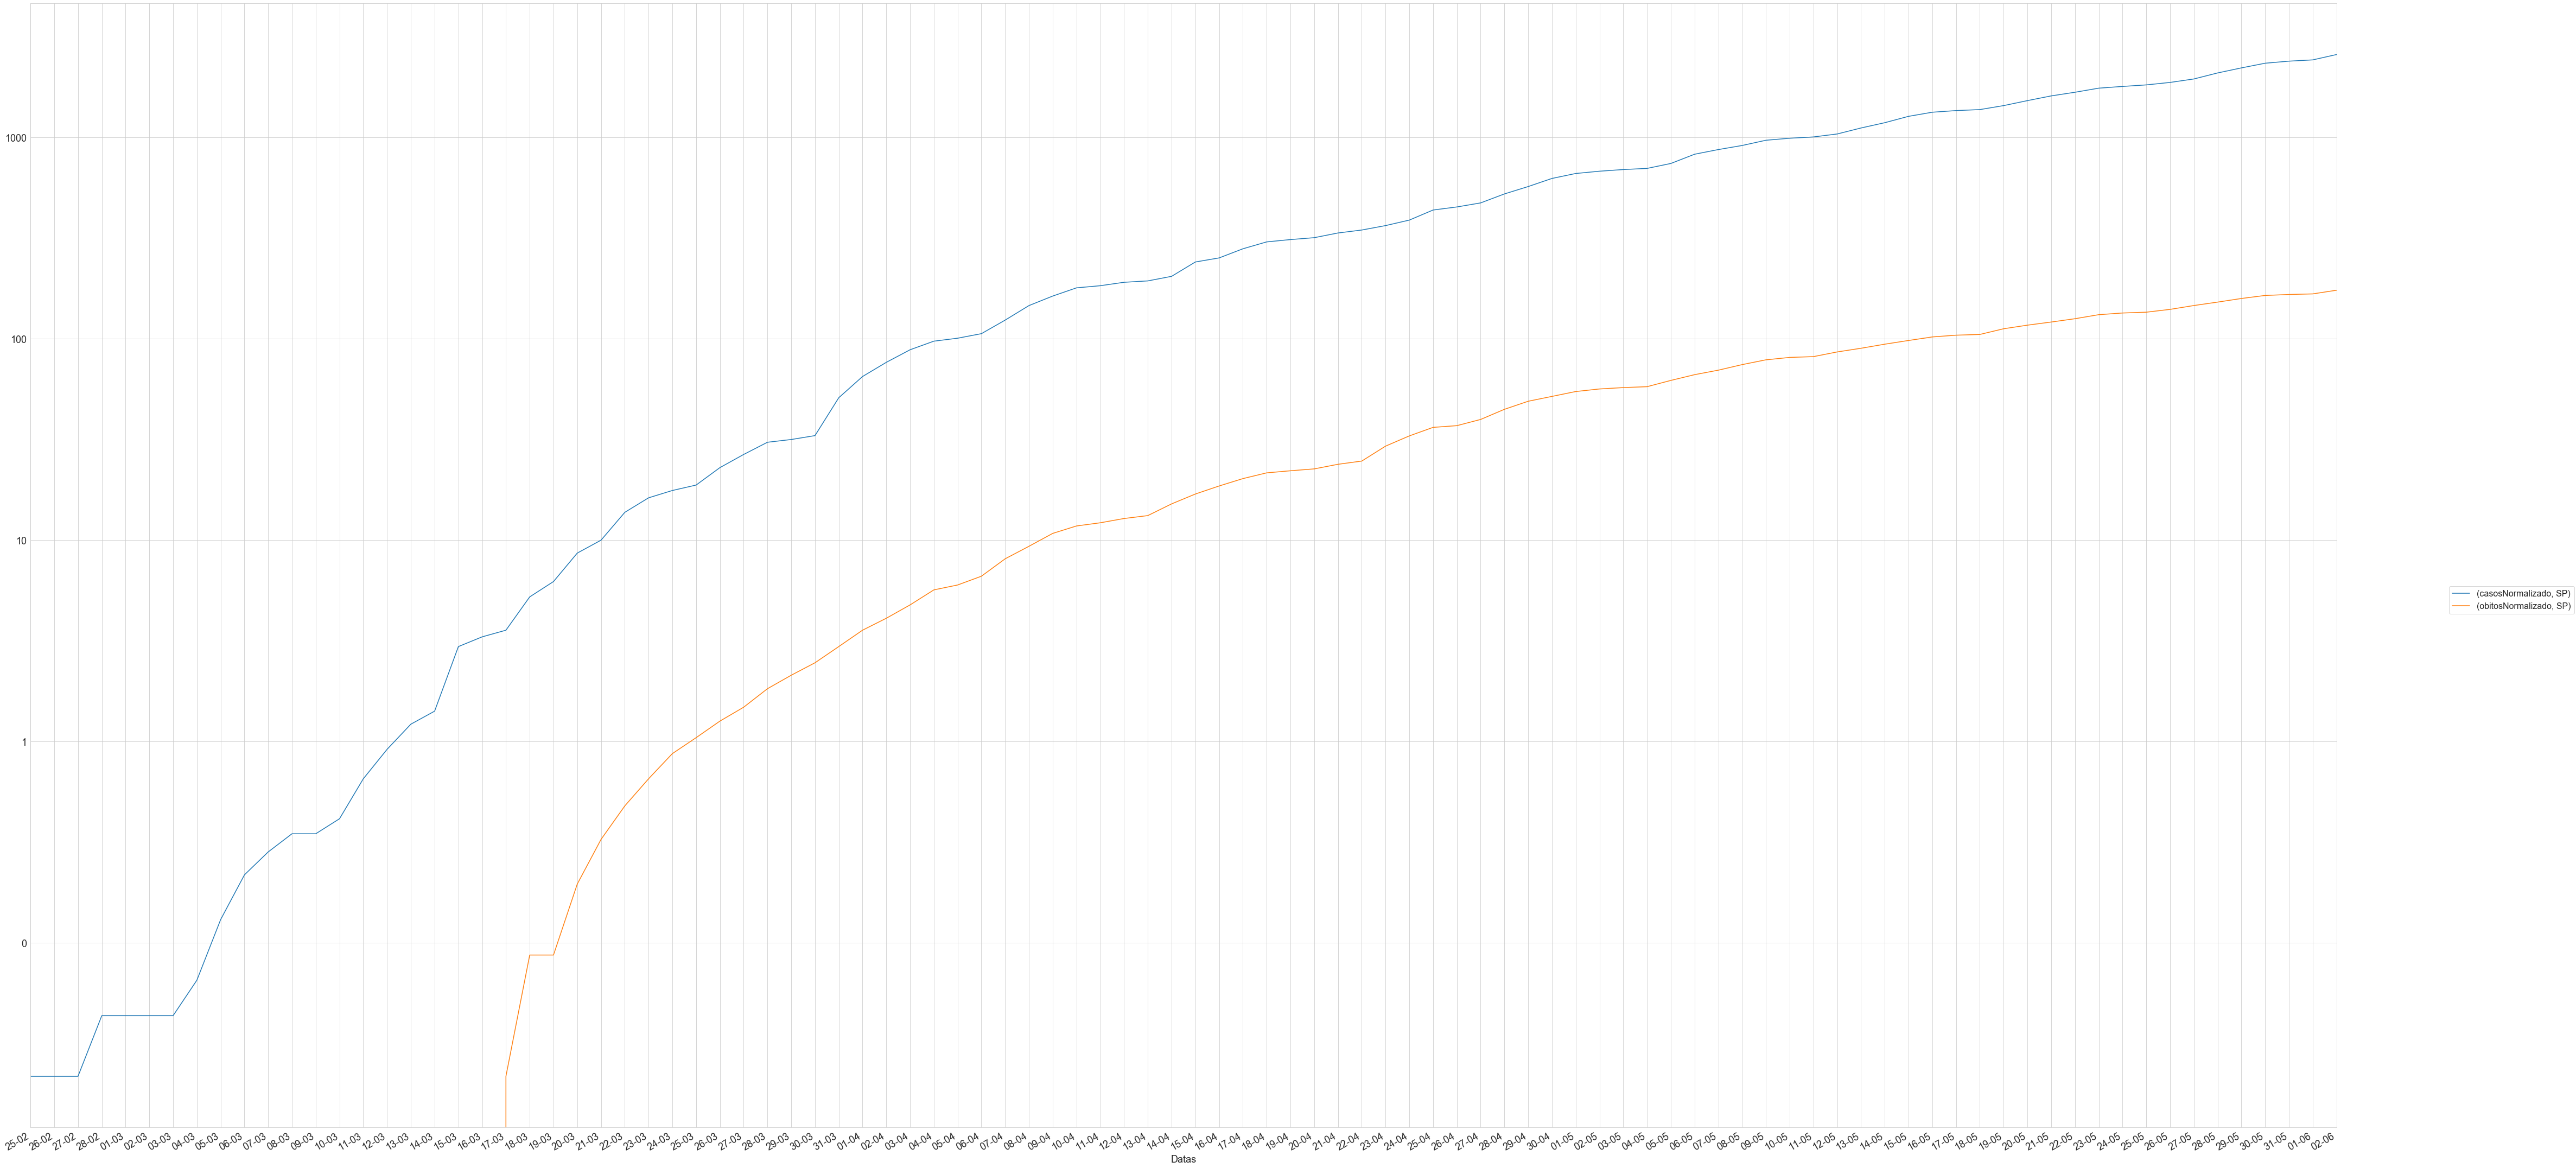

In [198]:
plot_data_completo(dataframe = dados_estados_mobilidade, column_string = 'estado', 
            rows_list = ['SP'], groupby_list = ['datetime', 'estado'],
            column_list = ['casosNormalizado', 'obitosNormalizado'], 
            title_string = "", 
            legend_bool = True, logy_bool = True, figsize_x = 60, figsize_y = 30, 
            bbox_anchor_x = 1.1, bbox_anchor_y = 0.5, labels_fontsize = 18,
            xaxis_datetime_bool = True, xaxis_title_string = 'Datas', yaxis_title_string = '')

In [207]:
dados_estados_mobilidade[(dados_estados_mobilidade['datetime'] < '2020-05-17') & \
                         (dados_estados_mobilidade['datetime'] > '2020-05-01') & \
                         (dados_estados_mobilidade['estado'] == 'SP')]

,regiao,estado,data,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,...,casosNormalizado,obitosNormalizado,contadorDiasCasos,contadorObitosCasos,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
1587,Sudeste,SP,2020-05-02,45919049,31174,800,2586,75,0,0,...,678.890366,56.316497,67,47,-63.0,-8.0,-53.0,-52.0,-31.0,16.0
1588,Sudeste,SP,2020-05-03,45919049,31772,598,2627,41,0,0,...,691.913284,57.209373,68,48,-66.0,-19.0,-55.0,-54.0,-22.0,13.0
1589,Sudeste,SP,2020-05-04,45919049,32187,415,2654,27,0,0,...,700.950928,57.797364,69,49,-57.0,-13.0,-47.0,-52.0,-33.0,18.0
1590,Sudeste,SP,2020-05-05,45919049,34053,1866,2851,197,0,0,...,741.587658,62.087523,70,50,-57.0,-10.0,-46.0,-52.0,-36.0,18.0
1591,Sudeste,SP,2020-05-06,45919049,37853,3800,3045,194,0,0,...,824.341985,66.312349,71,51,-56.0,-10.0,-45.0,-52.0,-36.0,19.0
1592,Sudeste,SP,2020-05-07,45919049,39928,2075,3206,161,0,0,...,869.530203,69.818519,72,52,-54.0,2.0,-40.0,-51.0,-36.0,19.0
1593,Sudeste,SP,2020-05-08,45919049,41830,1902,3416,210,0,0,...,910.950921,74.391785,73,53,-52.0,6.0,-40.0,-48.0,-32.0,18.0
1594,Sudeste,SP,2020-05-09,45919049,44411,2581,3608,192,0,0,...,967.158532,78.573056,74,54,-54.0,10.0,-49.0,-42.0,-23.0,15.0
1595,Sudeste,SP,2020-05-10,45919049,45444,1033,3709,101,0,0,...,989.654642,80.772579,75,55,-60.0,-2.0,-56.0,-46.0,-7.0,10.0
1596,Sudeste,SP,2020-05-11,45919049,46131,687,3743,34,0,0,...,1004.615753,81.513012,76,56,-57.0,-13.0,-46.0,-50.0,-33.0,19.0


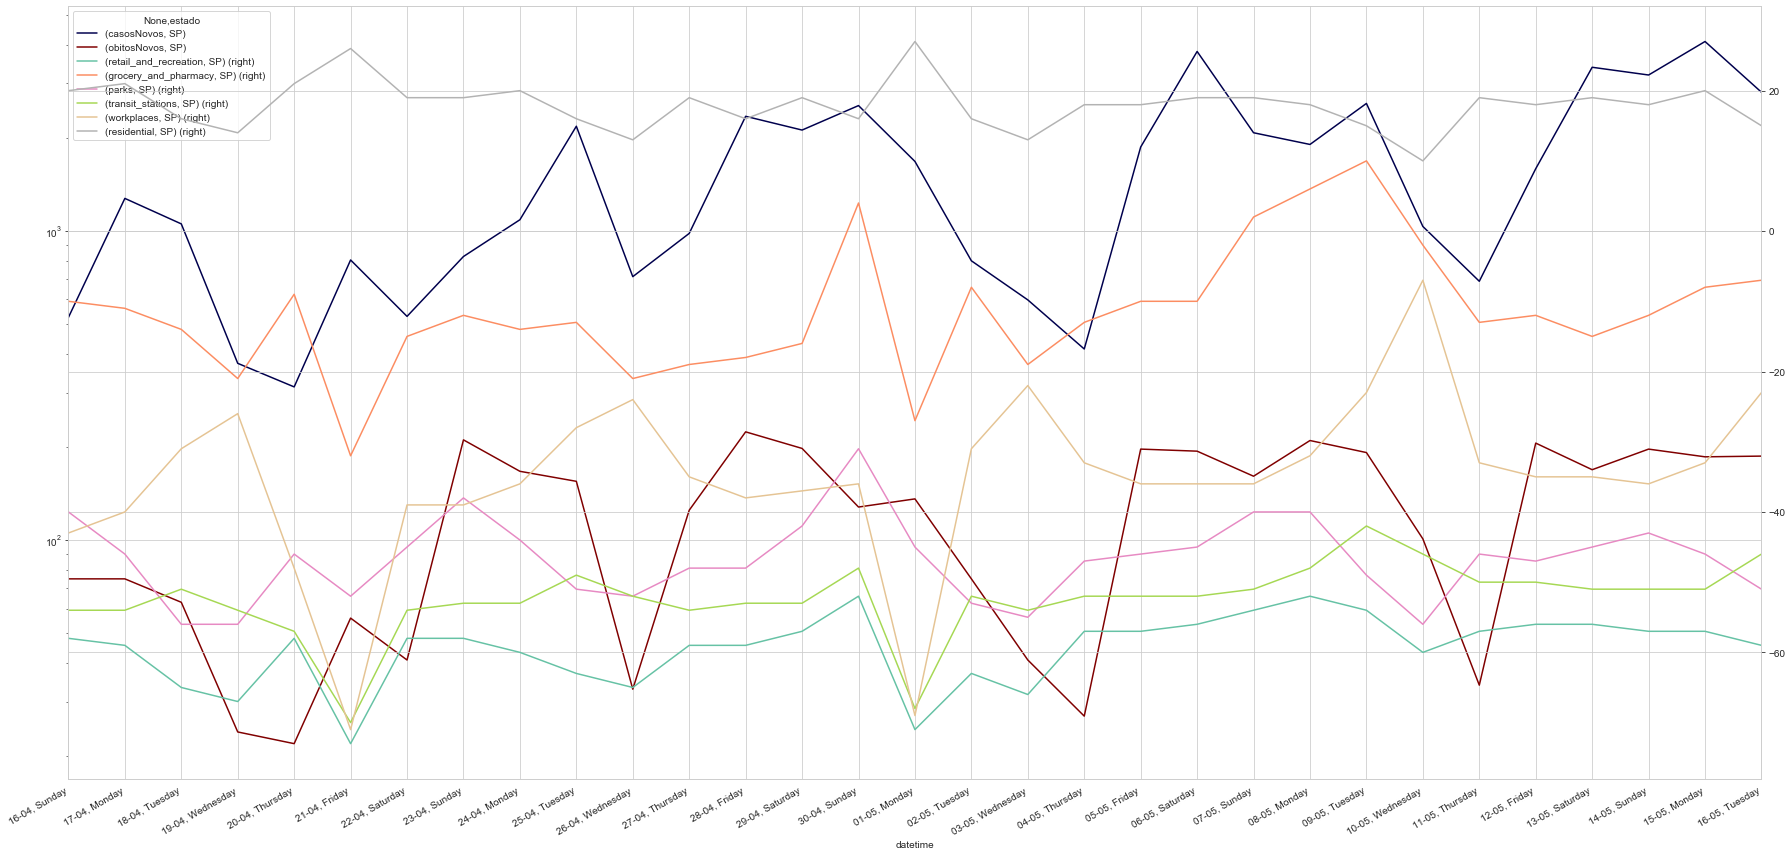

In [245]:
# ax1 = matplotlib.axes._subplots.AxesSubplot
ax1 = dados_estados_mobilidade[(dados_estados_mobilidade['datetime'] < '2020-05-17') & (dados_estados_mobilidade['datetime'] > '2020-04-15') & (dados_estados_mobilidade['estado'] == 'SP')]\
    .loc[dados_estados_mobilidade['estado'].isin(['SP'])]\
    .groupby(['datetime', 'estado'])['casosNovos', 'obitosNovos']\
    .sum()\
    .unstack()\
    .plot(figsize=(25, 12), logy=True, cmap='seismic')


ax2 = dados_estados_mobilidade[(dados_estados_mobilidade['datetime'] < '2020-05-17') & (dados_estados_mobilidade['datetime'] > '2020-04-15') & (dados_estados_mobilidade['estado'] == 'SP')]\
    .loc[dados_estados_mobilidade['estado'].isin(['SP'])]\
    .groupby(['datetime', 'estado'])['retail_and_recreation', 'grocery_and_pharmacy', 'parks', 'transit_stations', 'workplaces', 'residential']\
    .sum()\
    .unstack()\
    .plot(figsize=(25, 12), logy=False, secondary_y=True, ax = ax1, cmap='Set2')
ax1.grid(True)
ax2.grid(True)

legend_bool = True
bbox_anchor_x = 1.1
bbox_anchor_y = 0.5
labels_fontsize = 18
xaxis_datetime_bool = True
xaxis_title_string = 'Datas'
yaxis_title_string = ''
        
# # Posiciona caixa de legendas para fora do gráfico, ao lado direito, se o usuário escolher ter legenda
# if legend_bool == True:
#     plt.gcf().legend(bbox_to_anchor=(bbox_anchor_x, bbox_anchor_y), prop={'size': labels_fontsize-2})

# Formata ticks do eixo x como datas, se o usuário escolher usar datas no eixo x
if xaxis_datetime_bool == True:
    # formato da data do eixo para dia-mês e localização dos ticks no eixo
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m, %A')) # '%d-%m' dia-mês; %U or %W Week number of the year
    plt.gca().xaxis.set_major_locator(mdates.DayLocator()) #mdates.DayLocator(); mdates.MonthLocator() determina a posição do tick quando se plota datas

    # rotaciona as labels do eixo x
    plt.gcf().autofmt_xdate()

# nome do título do eixo
plt.gca().set_xlabel(xaxis_title_string)
plt.gca().set_ylabel(yaxis_title_string)

# # formata número (i.e. 10^4 para 10000 - %d=integer)
# plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))

# tamanho da fonte das labels/títulos do eixo
plt.gca().title.set_fontsize(labels_fontsize) 
plt.gca().xaxis.label.set_fontsize(labels_fontsize) 
plt.gca().yaxis.label.set_fontsize(labels_fontsize)

# tamanho da fonte dos 'ticks' (dados/números/datas) do eixo
# list comprehension para cada item/dados/número/dado do eixo
[tick.label.set_fontsize(labels_fontsize) for tick in plt.gca().xaxis.get_major_ticks()]
[tick.label.set_fontsize(labels_fontsize) for tick in plt.gca().yaxis.get_major_ticks()]

plt.tight_layout()

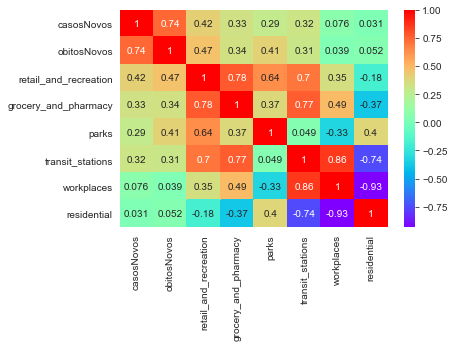

In [246]:
sns.heatmap(dados_estados_mobilidade[(dados_estados_mobilidade['datetime'] < '2020-05-17') & \
                                     (dados_estados_mobilidade['datetime'] > '2020-04-15') & \
                                     (dados_estados_mobilidade['estado'] == 'SP')]\
                                    [['datetime', 'casosNovos', 'obitosNovos', 
                                      'retail_and_recreation', 'grocery_and_pharmacy', 'parks',
                                      'transit_stations', 'workplaces', 'residential']].corr(), cmap='rainbow', annot=True)